import pandas as pd
import numpy as np

df = pd.read_csv('/Users/liushuyuan/Desktop/Dario/iSchool/INST627/RawData.csv')
df.head(20)

In [31]:
import scipy.stats as stats
import pandas as pd

import numpy as np

df = pd.read_csv('/Users/liushuyuan/Desktop/Dario/iSchool/INST627/RawData.csv')
df.head(60)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,4291.5,All races/ ethnicities (aggregated),2017,Mental Health ED visits
1,Allegany,3309.6,All races/ ethnicities (aggregated),2017,Mental Health ED visits
2,Anne Arundel,5734.1,All races/ ethnicities (aggregated),2017,Mental Health ED visits
3,Baltimore City,10093.5,All races/ ethnicities (aggregated),2017,Mental Health ED visits
4,Baltimore County,4210.1,All races/ ethnicities (aggregated),2017,Mental Health ED visits
5,Calvert,2999.1,All races/ ethnicities (aggregated),2017,Mental Health ED visits
6,Caroline,7556.2,All races/ ethnicities (aggregated),2017,Mental Health ED visits
7,Carroll,4216.0,All races/ ethnicities (aggregated),2017,Mental Health ED visits
8,Cecil,9584.2,All races/ ethnicities (aggregated),2017,Mental Health ED visits
9,Charles,2817.6,All races/ ethnicities (aggregated),2017,Mental Health ED visits


In [32]:
#f|ind the number of each categories of the jurisdiction
df.Jurisdiction.value_counts()

State               50
Harford             50
Wicomico            50
Washington          50
Talbot              50
Somerset            50
Saint Mary's        50
Queen Anne's        50
Prince George's     50
Montgomery          50
Kent                50
Howard              50
Garrett             50
Allegany            50
Frederick           50
Dorchester          50
Charles             50
Cecil               50
Carroll             50
Caroline            50
Calvert             50
Baltimore County    50
Baltimore City      50
Anne Arundel        50
Worcester           50
Name: Jurisdiction, dtype: int64

In [33]:
df['Race/ ethnicity'].value_counts()

All races/ ethnicities (aggregated)     250
Hispanic                                250
Black Non-Hispanic                      225
White Non-Hispanic                      225
Asian/ Pacific Islander Non-Hispanic    225
Black                                    25
White                                    25
Asian/ Pacific Islander                  25
Name: Race/ ethnicity, dtype: int64

In [34]:
#iqr based outlier detection / find 25 ~75 



#Hypothesis H0: The Mean of outcome of the
#the vlue of Mental Health ED visits among the various 
#jurisdictions in Maryland for the year 2008~ 2017.

#H1: The mean of value is not the same among 
#the mental health-related ED visits among the various 
#jurisdictions in Maryland for the year 2017.


In [35]:
#Check the assumption:
#1: Normality:
df_State_Values = df[df['Jurisdiction']== 'State']['Value']
#check for NaN values in the "State"
state_values_nan_check = df_State_Values.isna().sum()
state_values_nan_check

1

In [36]:
import pandas as pd
#Remove NaN
State_clean = df_State_Values.dropna()
State_clean

#number of data points 
state_value_count = df_State_Values.count()
state_value_count

49

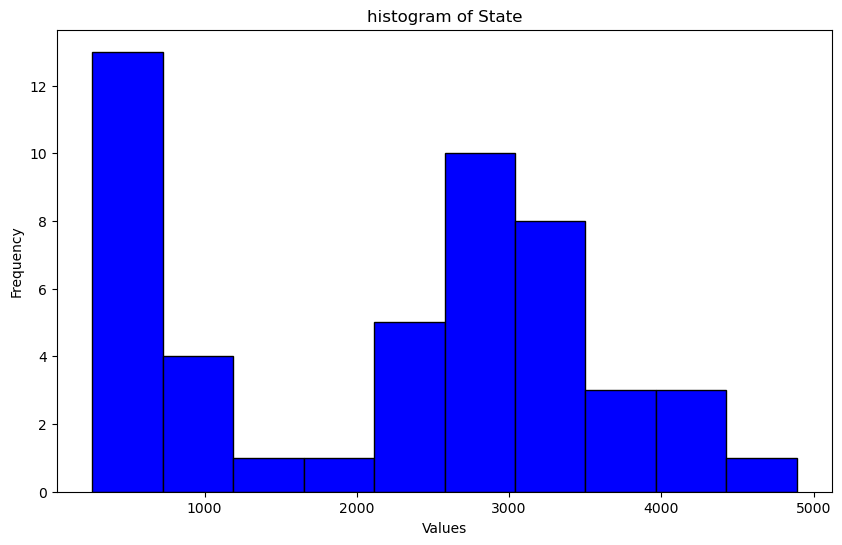

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(State_clean, bins=10, color='blue', edgecolor='black')
plt.title('histogram of State')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [38]:
df_State_Values = df[df['Jurisdiction']== 'State']['Value']

In [39]:
iqr_values = {}

for jurisdiction in df['Jurisdiction'].unique():
    jurisdiction_values = df[df['Jurisdiction']== jurisdiction]['Value'].dropna()
    
    #Calculate IQR
    Q1 = jurisdiction_values.quantile(0.25)
    Q3 = jurisdiction_values.quantile(0.75)
    
    IQR = Q3 - Q1 
    
    iqr_values[jurisdiction] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}
    
for jurisdiction, stats in iqr_values.items():
    print(f"{jurisdiction}: Q1 = {stats['Q1']}, Q3 = {stats['Q3']}, IQR = {stats['IQR']}")
    


State: Q1 = 667.8, Q3 = 3318.5, IQR = 2650.7
Allegany: Q1 = 2329.275, Q3 = 3552.25, IQR = 1222.975
Anne Arundel: Q1 = 1024.9, Q3 = 3803.4, IQR = 2778.5
Baltimore City: Q1 = 1279.4, Q3 = 6287.75, IQR = 5008.35
Baltimore County: Q1 = 844.3, Q3 = 3314.1, IQR = 2469.8
Calvert: Q1 = 1647.0, Q3 = 2827.575, IQR = 1180.5749999999998
Caroline: Q1 = 3760.3500000000004, Q3 = 4825.5, IQR = 1065.1499999999996
Carroll: Q1 = 2024.7, Q3 = 3812.2, IQR = 1787.4999999999998
Cecil: Q1 = 4449.05, Q3 = 8825.150000000001, IQR = 4376.100000000001
Charles: Q1 = 1328.3, Q3 = 2482.4, IQR = 1154.1000000000001
Dorchester: Q1 = 6509.9, Q3 = 8927.4, IQR = 2417.5
Frederick: Q1 = 1235.925, Q3 = 3545.625, IQR = 2309.7
Garrett: Q1 = 1778.475, Q3 = 7333.15, IQR = 5554.674999999999
Harford: Q1 = 1684.15, Q3 = 3187.55, IQR = 1503.4
Howard: Q1 = 1263.975, Q3 = 2633.825, IQR = 1369.85
Kent: Q1 = 3242.075, Q3 = 4634.224999999999, IQR = 1392.1499999999996
Montgomery: Q1 = 577.0, Q3 = 1578.7, IQR = 1001.7
Prince George's: Q1 = 

In [40]:

filtered_values_dict = {}

# Loop through each unique jurisdiction in the DataFrame
for jurisdiction in df['Jurisdiction'].unique():
    # Extract the values for the current jurisdiction, removing any NaN values
    jurisdiction_values = df[df['Jurisdiction'] == jurisdiction]['Value'].dropna()
    
    # Calculate Q1, Q3, and IQR
    Q1 = jurisdiction_values.quantile(0.25)
    Q3 = jurisdiction_values.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Exclude outliers
    non_outliers = jurisdiction_values[(jurisdiction_values >= lower_bound) & (jurisdiction_values <= upper_bound)]
    filtered_values_dict[jurisdiction] = non_outliers

# Initialize the cleaned DataFrame outside the loop
cleaned_data_no_outliers = pd.DataFrame(columns=df.columns)

# Loop through the filtered values to append them to the cleaned DataFrame
for jurisdiction, values in filtered_values_dict.items():
    # Create a new DataFrame for the current jurisdiction without outliers
    temp_df = df[(df['Jurisdiction'] == jurisdiction) & (df['Value'].isin(values))]
    # Append the non-outlier rows to the cleaned DataFrame
    cleaned_data_no_outliers = cleaned_data_no_outliers.append(temp_df, ignore_index=True)

cleaned_data_no_outliers
    
    
 

/var/folders/b_/zvz66r790cx4rcyvc01dc1h40000gn/T/ipykernel_3333/125414485.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_data_no_outliers = cleaned_data_no_outliers.append(temp_df, ignore_index=True)


,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,4291.5,All races/ ethnicities (aggregated),2017,Mental Health ED visits
1,State,4889.6,Black Non-Hispanic,2017,Mental Health ED visits
2,State,1693.6,Hispanic,2017,Mental Health ED visits
3,State,4077.1,White Non-Hispanic,2017,Mental Health ED visits
4,State,464.3,Asian/ Pacific Islander Non-Hispanic,2017,Mental Health ED visits
...,...,...,...,...,...
914,Worcester,1811.6,Black Non-Hispanic,2009,Mental Health ED visits
915,Worcester,1380.7,White Non-Hispanic,2009,Mental Health ED visits
916,Worcester,2412.2,All races/ ethnicities (aggregated),2008,Mental Health ED visits
917,Worcester,1840.1,Black Non-Hispanic,2008,Mental Health ED visits


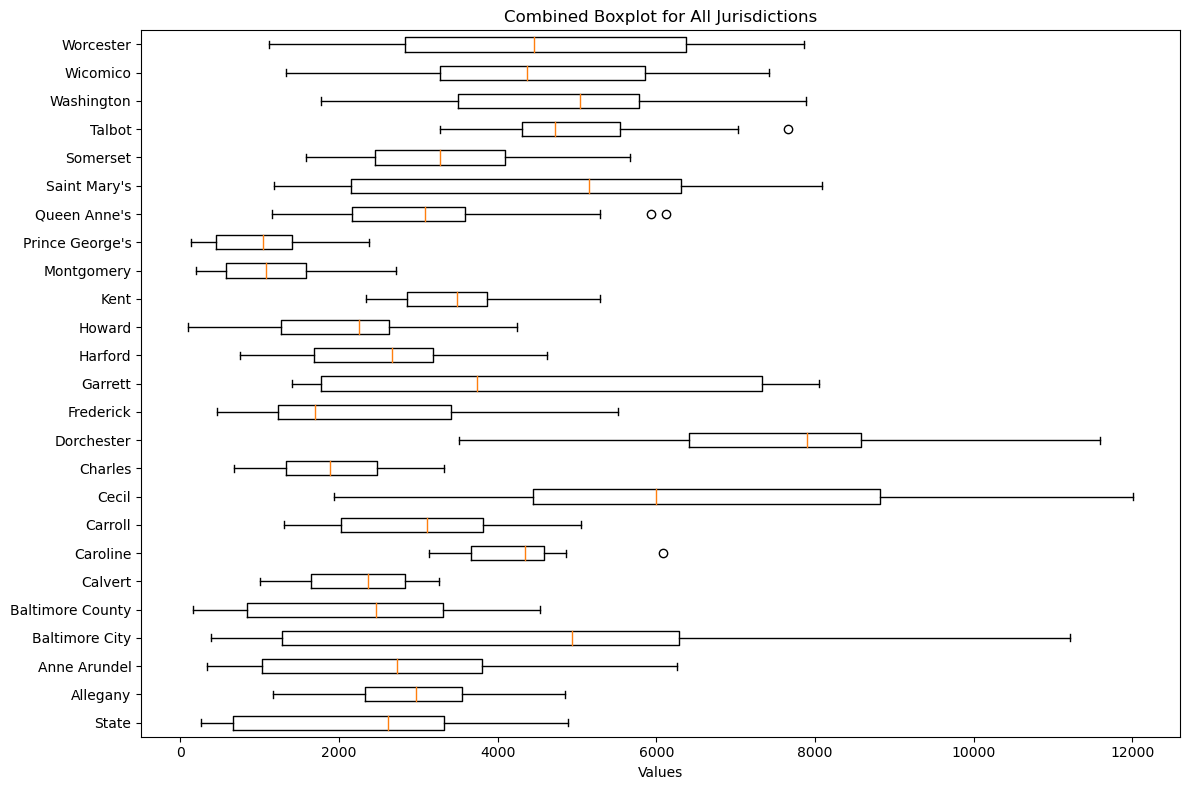

In [41]:

import matplotlib.pyplot as plt

value_lists = [values for values in filtered_values_dict.values()] 
labels = [jurisdiction for jurisdiction in filtered_values_dict.keys()]

plt.figure(figsize = (12,8))

plt.boxplot(value_lists, vert=False, labels = labels)
plt.title('Combined Boxplot for All Jurisdictions')
plt.xlabel('Values')
plt.tight_layout()  # Adjust the layout to fit all jurisdiction labels
plt.show()



ConversionError: Failed to convert value(s) to axis units: [0       4291.5
25      4889.6
50      1693.6
75      4077.1
100      464.3
126     3796.7
151     4220.0
176     1461.3
201     3679.2
226      588.3
251     2909.0
276     2907.5
325     2860.2
350      388.1
375     3442.6
400     2913.7
425     1093.8
450     3373.2
475      324.0
500     3318.5
524     3546.5
526     2965.7
551     1072.9
576     3463.3
602      353.2
627     3500.6
653     3105.7
678     1147.3
726      290.5
751     3211.2
776     2820.3
801      739.8
825     3473.0
850      298.8
876     2780.8
901     2431.8
926      667.8
950     2964.5
975      262.2
1000    2550.9
1025    2249.6
1050     666.4
1075    2688.5
1100     279.6
1125    2393.0
1150    2195.1
1175     646.9
1200    2617.4
1225     271.7
Name: Value, dtype: float64, 1       3309.6
26      1971.2
76      3554.5
127     2528.9
152     1257.5
202     2696.9
252     3739.4
277     2374.0
326     3957.2
376     4722.9
401     2875.7
451     4851.2
501     4318.2
527     2355.3
577     4561.0
628     3107.8
654     1757.8
702     3388.2
752     2797.5
777     1724.5
826     3061.1
877     2320.6
902     1172.2
951     2555.9
1001    3523.1
1026    2050.3
1076    3800.2
1126    3363.4
1151    2091.4
1201    3545.5
Name: Value, dtype: float64, 2       5734.1
27      6266.3
52      3298.9
77      5654.4
102     1095.9
128     5026.4
153     5349.6
178     2541.1
203     5017.7
228     1024.9
253     3723.1
278     3939.2
327     3661.7
352      716.3
377     4509.9
402     4504.5
427     2048.2
452     4450.5
477      787.1
502     3829.0
528     3556.6
553     1461.9
578     3870.0
604      813.8
630     3803.4
655     2509.3
680      731.0
703     2728.3
728      391.8
753     3530.2
778     2350.5
803      730.6
827     2712.3
852      430.7
878     3397.7
903     2205.6
928      630.3
952     2575.7
977      329.1
1002    3405.2
1027    2599.9
1052     818.8
1077    3045.9
1102     398.7
1127    3392.0
1152    3193.9
1177    1105.0
1202    3652.8
1227     591.5
Name: Value, dtype: float64, 3       10093.5
28      11221.4
53       3526.2
78       8330.5
103      1173.4
129      8551.8
154      9236.7
179      2753.1
204      7557.8
229      1872.9
254      5895.2
279      5928.4
328      5075.2
353      1132.9
378      6782.0
403      4954.7
428      1300.8
453      3982.8
478       462.0
503      6301.7
529      5588.9
554      1313.9
579      5106.5
605       488.7
631      6323.8
656      6395.2
681      1538.2
704      6969.2
729       477.7
754      5851.0
779      5912.8
804      1108.7
828      6680.0
853       487.4
879      5131.2
904      5011.7
929      1052.0
953      6283.1
978       383.7
1003     4500.7
1028     4370.3
1053     1215.2
1078     5122.0
1128     4236.6
1153     4072.8
1178     1191.1
1203     4930.3
1228      435.6
Name: Value, dtype: float64, 4       4210.1
29      4528.0
54      1614.8
79      4232.2
104      462.6
130     3653.8
155     3662.8
180     1553.7
205     3812.6
230      671.4
255     2843.9
280     2382.2
329     2692.7
354      491.1
379     2967.5
404     1725.2
429      722.3
454     1670.3
479      156.7
504     2883.2
530     2347.3
555      886.5
580     2417.4
606      210.7
632     3665.0
657     3314.1
682      906.5
705     4189.3
730      222.9
755     3412.8
780     2983.5
805      778.5
829     3974.7
854      219.6
880     2959.4
905     2466.2
930      844.3
954     3467.6
979      207.9
1004    2981.8
1029    2630.7
1054     940.2
1079    3314.6
1104     298.8
1129    2912.5
1154    2599.0
1179     860.0
1204    3243.1
1229     255.7
Name: Value, dtype: float64, 5       2999.1
30      2840.7
80      3072.4
113     2391.8
131     3194.3
156     3023.0
206     3261.0
256     2669.3
330     2735.8
380     2859.1
405     2788.2
455     2941.7
505     2478.2
531     2337.9
581     2580.2
633     2501.5
658     2187.2
706     2301.0
756     2014.6
781     1787.1
830     1798.0
881     1795.7
906     1480.6
955     1600.3
1005    1390.4
1030    1138.8
1080    1337.0
1130    1217.9
1155     997.7
1205    1274.7
Name: Value, dtype: float64, 157     6085.2
257     3742.9
281     3133.9
331     3777.8
381     4369.6
406     3486.8
456     4731.4
506     4484.5
532     3250.9
582     4859.9
634     4587.7
659     3529.1
707     3434.0
757     4581.1
782     4603.9
831     4791.1
882     4222.8
907     4021.6
956     4393.4
1006    4339.9
1031    4531.0
1081    4532.6
1131    3659.1
1156    3260.7
1206    3914.2
Name: Value, dtype: float64, 7       4216.0
32      5016.4
57      1787.1
82      4204.2
133     4058.0
158     5047.8
183     1571.9
208     4029.8
258     2949.5
282     3368.3
332     2940.3
382     3140.8
407     3107.1
432     1509.3
457     3113.9
507     3368.5
533     4088.2
583     3382.5
635     3087.7
660     3546.0
708     3140.9
758     3812.2
783     3675.6
832     3938.3
883     2755.9
908     2982.1
957     2816.2
1007    1642.4
1032    2024.7
1082    1646.4
1132    1336.5
1157    1310.1
1207    1361.7
Name: Value, dtype: float64, 8        9584.2
33      12006.8
58       6060.4
83       9294.6
134      8684.0
159      9806.9
184      3396.8
209      8564.1
259      5172.7
283      5999.8
333      5054.3
383      5501.6
408      5536.3
433      1937.1
458      5656.7
508      8901.6
534      8478.7
559      2953.7
584      8871.7
629      3773.3
636     10570.8
661      8524.2
709      9674.5
759      9974.8
784      8778.6
809      3166.2
833      9829.1
884      7085.5
909      6143.9
933      2181.9
958      7136.0
1008     5808.0
1033     4346.6
1058     2298.0
1083     5752.3
1133     4670.4
1158     3673.4
1183     2187.6
1208     4551.5
Name: Value, dtype: float64, 9       2817.6
34      2391.5
59      1111.4
84      3293.7
135     2834.6
160     2391.8
185     1072.9
210     3317.7
260     1661.2
284     1435.8
334     1887.5
384     2346.9
409     1206.9
459     1843.9
509     3033.0
535     2140.3
560      677.6
585     3146.8
637     2586.6
662     1419.4
710     1954.4
760     1845.7
785     1019.5
834     1328.3
885     2561.2
910      787.5
959     1125.3
1009    2482.4
1034    1168.7
1084    1656.9
1134    1913.4
1159    1691.9
1209    2286.9
Name: Value, dtype: float64, 10      11251.8
60       5653.3
85       8927.4
136      7981.1
161     10114.4
211      6686.6
261      6809.6
285      7908.1
335      5933.5
385      8551.1
410      9870.6
435      3507.1
460      8180.3
510      8571.0
536     10832.6
587      7904.4
638     10089.4
663     11588.5
711      6970.9
761      6762.9
786      8599.0
835      6109.1
886      6870.5
911      8430.9
960      6509.9
1010     6723.6
1035     7903.4
1085     6307.6
1135     5219.8
1160     6222.7
1210     4879.4
Name: Value, dtype: float64, 11      3064.1
36      3589.0
61      1770.8
86      2933.8
111      476.5
137     2477.7
162     2857.1
187     1298.5
212     2384.5
237      468.0
262     3415.5
286     3901.7
336     3314.8
361      464.2
386     3892.0
411     4729.1
436     1903.2
461     4051.8
486      923.1
511     3788.9
537     4610.6
562     1593.9
588     3972.0
613      620.5
639     5282.6
688     1699.8
712     5519.2
737      735.5
762     3126.6
787     3804.2
812     1026.4
836     3296.4
861      588.1
887     1448.1
912     1646.9
936      611.2
961     1510.8
1011    1371.1
1036    1574.1
1061     841.7
1086    1394.9
1136    1229.8
1161    1372.3
1186     650.3
1211    1254.3
Name: Value, dtype: float64, 12      7967.6
87      8055.9
138     7324.3
213     7359.7
263     6367.1
337     6340.4
387     7826.4
462     7748.8
512     6910.0
589     4322.0
640     3106.1
713     3151.0
763     1525.4
837     1542.4
888     1764.3
962     1783.2
1012    1864.7
1087    1884.7
1137    1409.7
1212    1425.7
Name: Value, dtype: float64, 13      3020.2
38      3269.4
63      2344.6
88      2912.5
114      798.6
139     2644.4
164     3160.1
189     1521.0
214     2531.6
264     2284.5
288     2419.3
338     2173.9
388     2853.4
413     2908.6
438     1654.6
463     2661.6
513     3003.9
539     1737.7
564      746.1
590     1713.7
641     4625.0
666      941.8
714      810.5
764     4257.5
789     2504.8
814      900.7
838     2856.5
889     4082.5
914     3081.8
938     1343.5
963     3522.5
1013    4312.4
1038    3216.4
1063    1578.2
1088    3619.1
1138    3829.7
1163    2720.3
1188     836.5
1213    3215.0
Name: Value, dtype: float64, 14      3082.1
39      4240.1
64      2384.8
89      3091.8
140     2709.3
165     3532.7
190     1837.3
215     2752.4
240       99.5
265     2216.8
289     2825.3
339     2275.9
389     2613.8
414     3223.3
439     1784.4
464     2743.2
514     2222.3
540     2683.5
565     1335.6
591     2430.7
616      236.7
642     2266.0
667     2733.1
691     1106.4
715     2565.2
740      522.1
765     2249.2
790     2640.5
815     1240.1
839     2577.3
864      499.3
890     2068.3
915     2393.3
939     1102.7
964     2357.2
989      473.6
1014    1889.8
1039    2336.9
1064     875.9
1089    2039.0
1114     471.2
1139    2023.5
1164    2252.6
1189    1125.8
1214    2259.0
1239     451.8
Name: Value, dtype: float64, 266     4087.5
290     5292.0
340     3721.9
390     3590.3
415     4715.4
465     3515.4
515     3420.4
541     4016.2
592     3453.4
643     3335.4
668     3539.0
716     2427.5
766     3327.2
791     4165.7
840     3213.7
891     2786.4
916     3666.3
965     2442.4
1015    2887.4
1040    3815.2
1090    2653.9
1140    2599.0
1165    4390.7
1215    2338.0
Name: Value, dtype: float64, 16      2312.1
41      2710.5
66      1578.7
91      2039.9
117      463.4
142     2278.5
167     2717.8
192     1520.7
217     2088.1
242      558.6
267     1621.0
291     1918.1
341     1517.9
366      361.1
391     1791.7
416     2213.8
441      907.0
466     1875.7
491      356.3
516     1527.6
542     1772.2
567      665.8
586      670.1
593     1542.4
618      378.5
644     1339.4
669     1256.4
693      572.3
717     1076.0
742      227.3
767     1290.9
792     1259.0
841     1045.1
866      261.1
892     1111.3
917     1312.7
941      607.9
966      968.3
991      224.2
1016    1050.5
1041    1311.7
1066     565.1
1091     898.7
1116     232.4
1141     997.2
1166    1064.8
1191     577.0
1216     716.1
1241     200.8
Name: Value, dtype: float64, 17      1955.6
42      1958.4
67       824.2
92      1685.7
118      340.0
143     1861.6
168     1837.5
193      771.0
218     1694.6
243      451.2
268     1291.6
292     1298.0
342     1135.4
367      249.7
392     1539.3
417     1591.8
442      601.2
467     2381.9
492      191.2
517     1379.5
543     1400.5
568      542.5
594     2097.2
619      239.0
645     1314.5
670     1270.6
694      586.4
718     1646.1
743      185.6
768     1304.3
793     1042.1
817      474.7
842     1573.5
867      147.3
893     1206.2
918      882.4
942      389.4
967     1245.7
992      129.2
1017    1110.9
1042     791.1
1067     346.3
1092    1034.6
1117     203.1
1142     971.2
1167     846.5
1192     370.5
1217    1226.1
1242     207.2
Name: Value, dtype: float64, 18      6119.5
93      5937.1
144     5293.5
219     4972.0
269     3399.9
293     4327.4
343     3310.5
393     3435.4
418     4052.3
468     3449.8
518     2986.2
544     3179.9
595     2958.5
646     3280.3
671     3451.0
719     1706.5
769     2989.8
794     3991.9
843     2244.2
894     2159.5
919     1830.8
968     1148.4
1018    2420.3
1043    2351.0
1093    1863.1
1143    2072.0
1168    1834.7
1218    2149.7
Name: Value, dtype: float64, 19      6173.1
44      7083.6
69      1506.1
94      6067.1
145     5804.2
170     6998.0
195     1182.0
220     5644.7
245     2812.9
270     4793.1
294     5280.3
344     4770.3
394     7006.8
419     8086.0
444     2809.4
469     7086.9
519     6789.5
545     7443.4
570     2062.8
596     6998.6
647     6162.3
672     6425.8
696     1805.0
720     6355.0
770     5916.2
795     5963.5
819     2409.8
844     6118.6
895     4817.3
920     5015.9
944     2302.7
969     4754.7
1019    1826.2
1044    2106.2
1094    1693.7
1144    1254.1
1169    1465.9
1219    1250.4
Name: Value, dtype: float64, 20      2696.1
45      2378.5
95      3071.0
146     3265.9
171     2921.0
221     3520.7
271     4035.8
295     3275.3
345     4792.6
395     5665.2
420     3125.1
470     4115.7
520     5009.1
546     2407.5
597     3863.0
648     5008.8
673     2434.3
721     3885.7
771     4605.4
796     2092.7
845     3570.0
896     4606.5
921     1855.5
970     3084.6
1020    4168.7
1045    1649.0
1095    2523.3
1145    4042.3
1170    1580.5
1220    2130.5
Name: Value, dtype: float64, 21      7661.6
96      7013.5
147     7028.9
222     6520.6
272     3510.6
296     4418.4
346     3270.8
396     4444.2
421     5971.6
471     4510.9
521     4151.0
547     5179.2
598     4305.9
649     4918.0
674     4813.0
722     3829.9
772     4698.8
797     5454.0
846     4931.7
897     4301.3
922     5818.7
971     4297.9
1021    4892.6
1046    6189.1
1096    4757.5
1146    3772.2
1171    4611.8
1221    3678.8
Name: Value, dtype: float64, 22      5410.8
47      5037.8
72      4035.5
97      5337.7
148     3511.1
173     3091.6
198     1773.7
223     3487.3
273     3555.4
297     2823.2
347     3573.1
397     5785.3
422     4848.6
447     3643.7
472     5947.0
522     7168.4
548     5771.5
573     2543.0
599     7455.3
650     7472.1
675     5675.5
699     2835.9
723     7888.9
773     7318.2
798     5334.9
822     3158.5
847     7633.9
898     6730.6
923     5385.7
947     3331.3
972     7051.9
1022    4968.9
1047    3930.7
1072    3442.9
1097    5215.8
1147    5171.8
1172    4035.0
1197    2703.8
1222    5465.5
Name: Value, dtype: float64, 23      2897.6
48      3391.8
73      1576.0
98      2631.6
149     2863.5
174     3233.2
199     2947.6
224     2670.1
274     3949.9
298     4374.7
348     3813.6
398     6207.9
423     7421.6
448     4373.8
473     5883.9
523     6163.5
549     6860.1
574     4517.7
600     6289.4
651     6130.3
676     6774.4
700     4371.0
724     6202.1
774     5569.5
799     6079.7
823     1333.2
848     5784.3
899     4662.9
924     5393.5
948     1429.0
973     4600.8
1023    4208.3
1048    4650.4
1073    1828.2
1098    4132.1
1148    3705.1
1173    3857.8
1223    3676.3
Name: Value, dtype: float64, 24      3502.8
49      3116.1
99      3575.2
150     3657.0
175     3170.3
225     3766.3
275     5680.7
299     5840.9
349     5732.7
399     7509.3
424     7001.4
474     7857.8
525     6659.3
550     5646.4
601     7165.9
652     6446.1
677     5144.7
725     6920.2
775     6132.7
800     5552.2
849     6449.7
900     3149.1
925     2617.7
974     2347.7
1024    2744.3
1049    1811.6
1099    1380.7
1149    2412.2
1174    1840.1
1224    1113.8
Name: Value, dtype: float64]

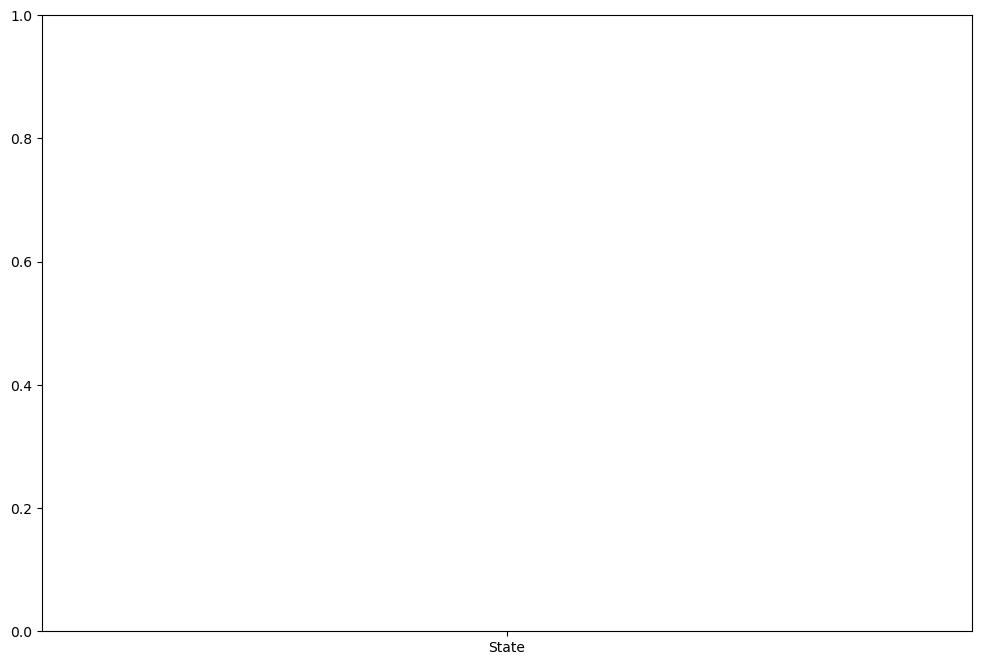

In [42]:
#Groupby based on each jurisdiction
#every_jurisdiction = 


value_lists = [values for values in filtered_values_dict.values()] 
labels = [jurisdiction for jurisdiction in filtered_values_dict.keys()]

plt.figure(figsize = (12,8))

plt.hist(labels, value_lists, color='skyblue')
plt.title('Combined Boxplot for All Jurisdictions')
plt.xlabel('Values')
plt.tight_layout()  # Adjust the layout to fit all jurisdiction labels
plt.show()

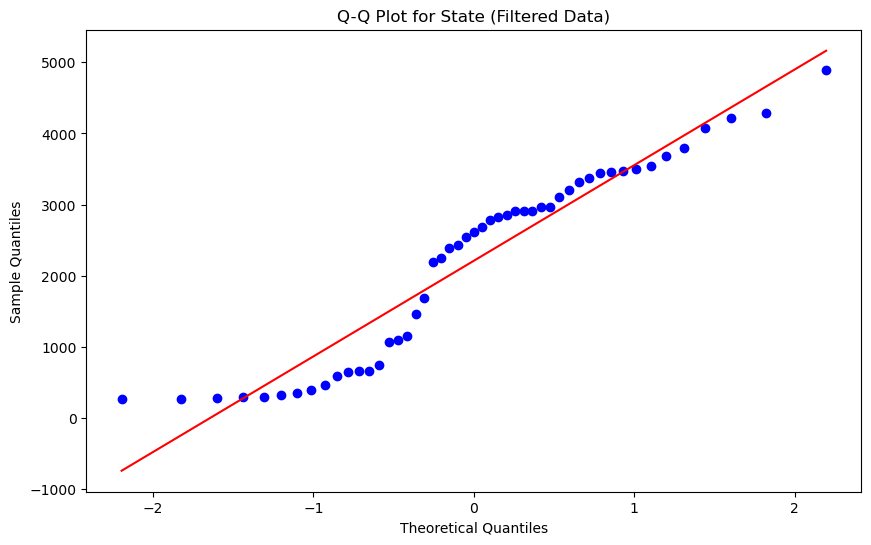

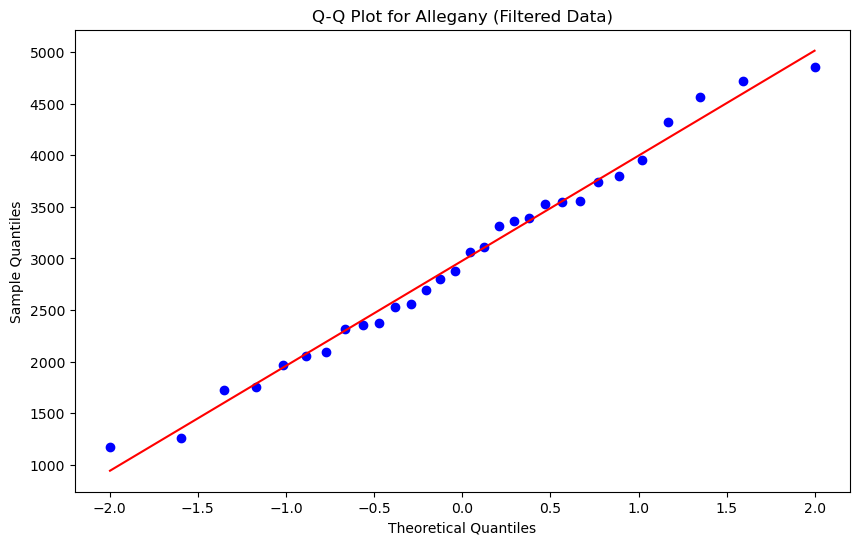

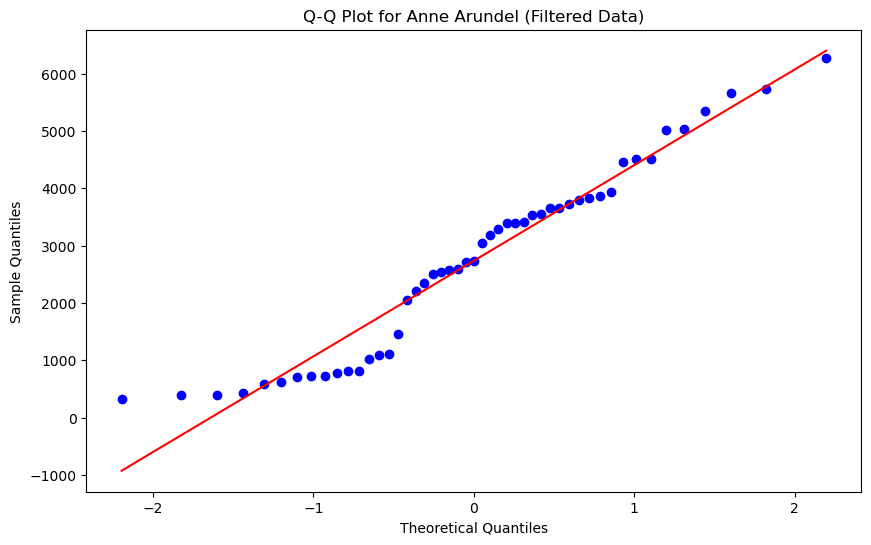

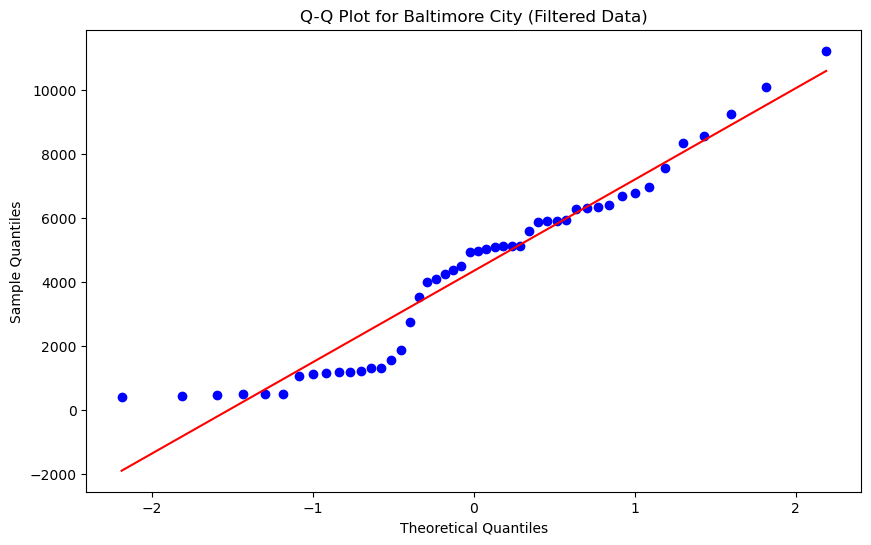

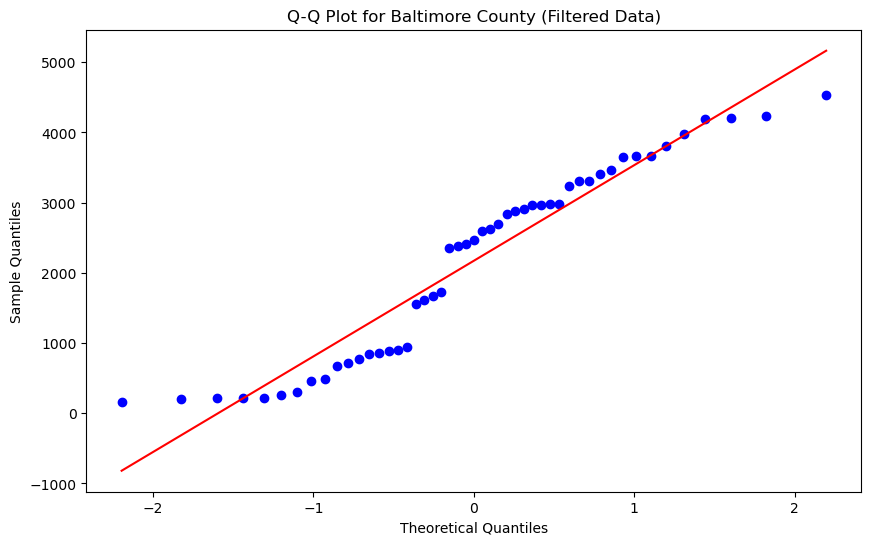

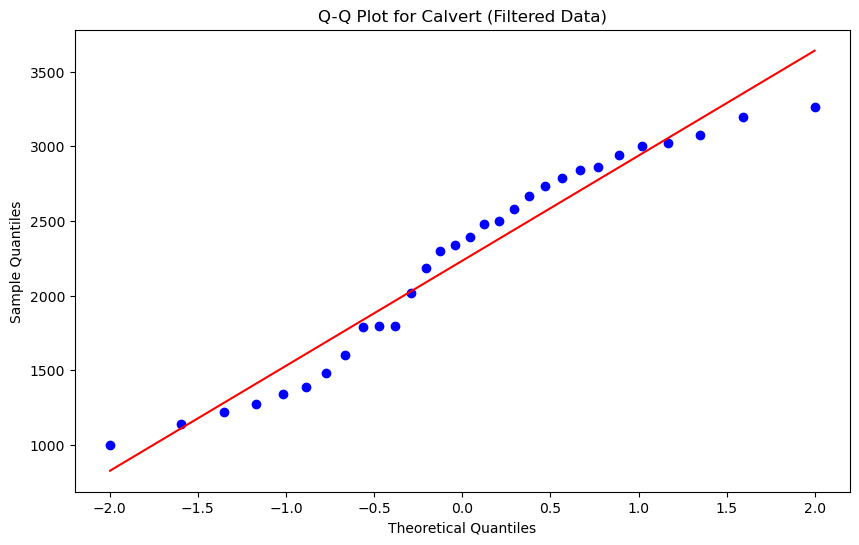

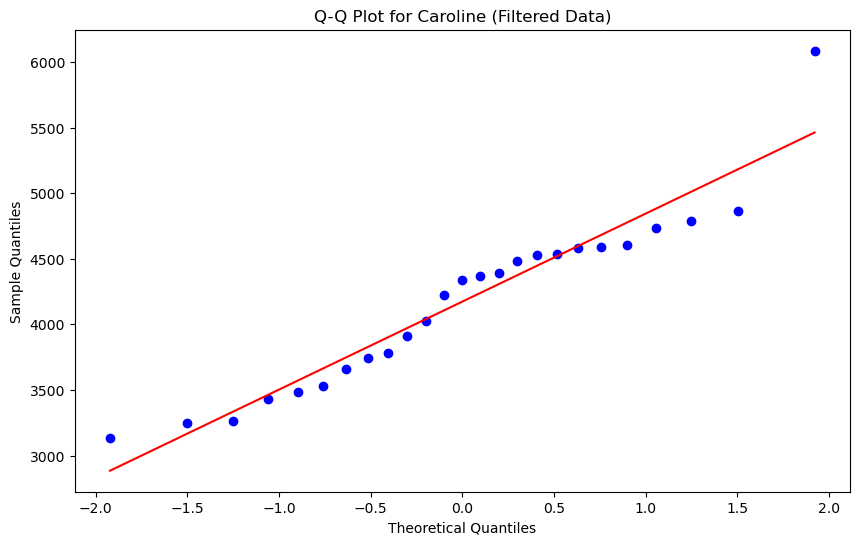

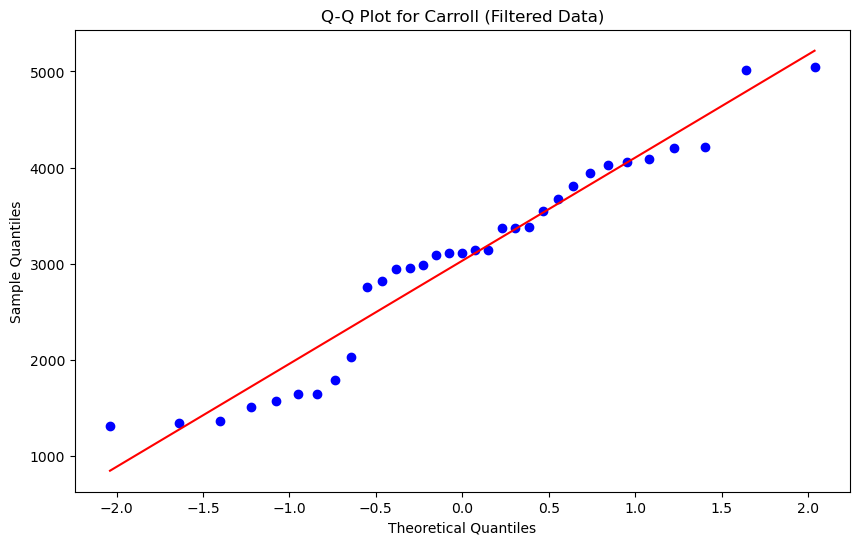

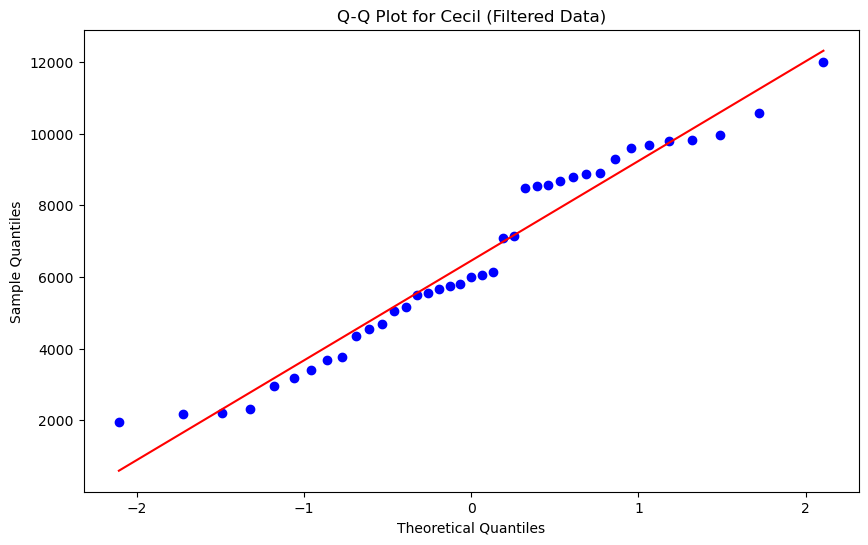

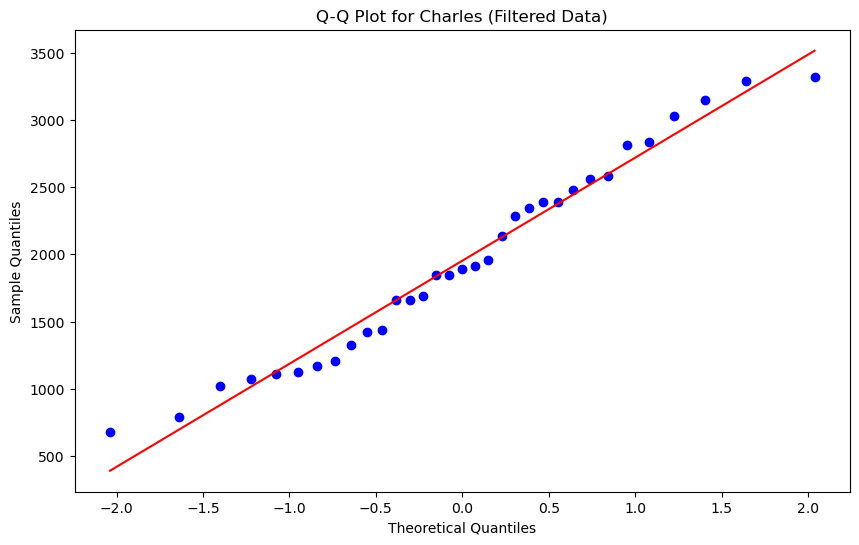

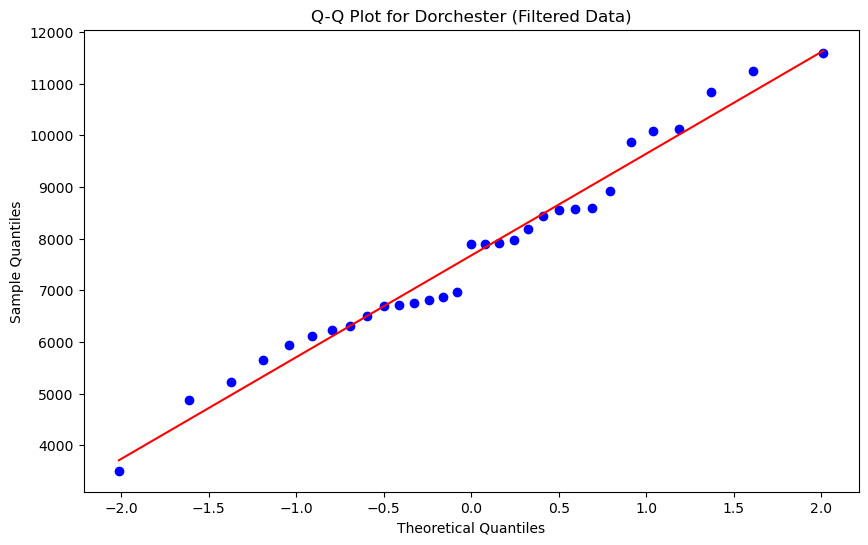

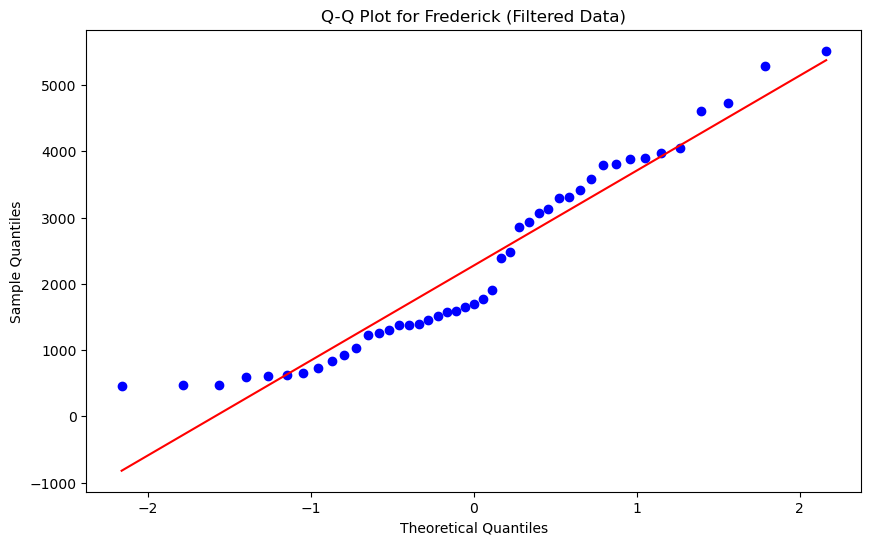

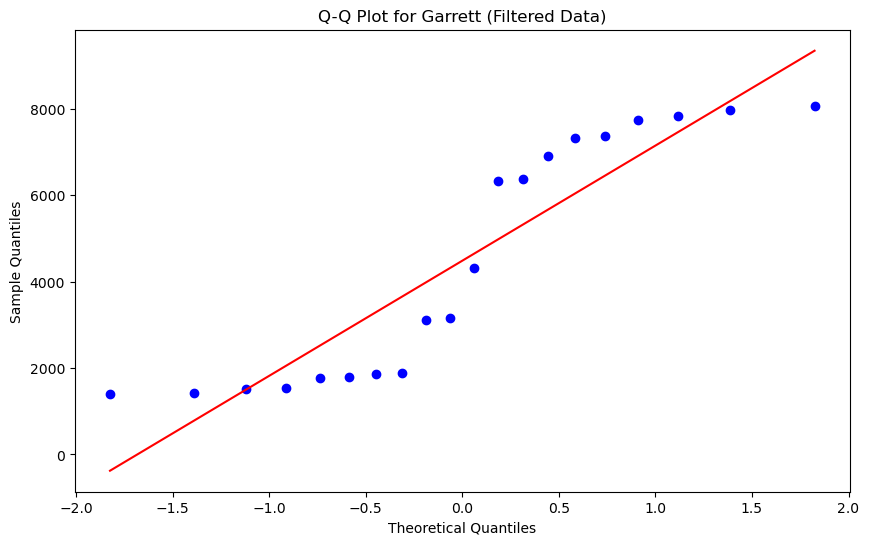

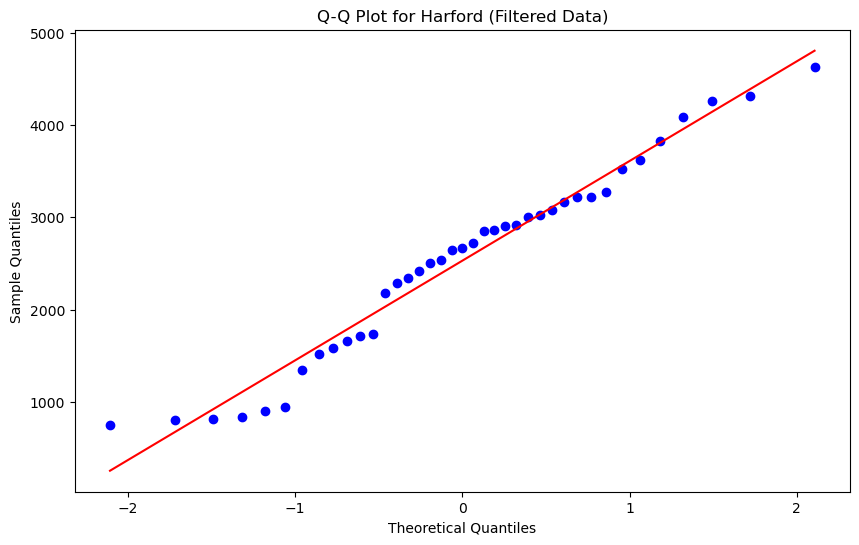

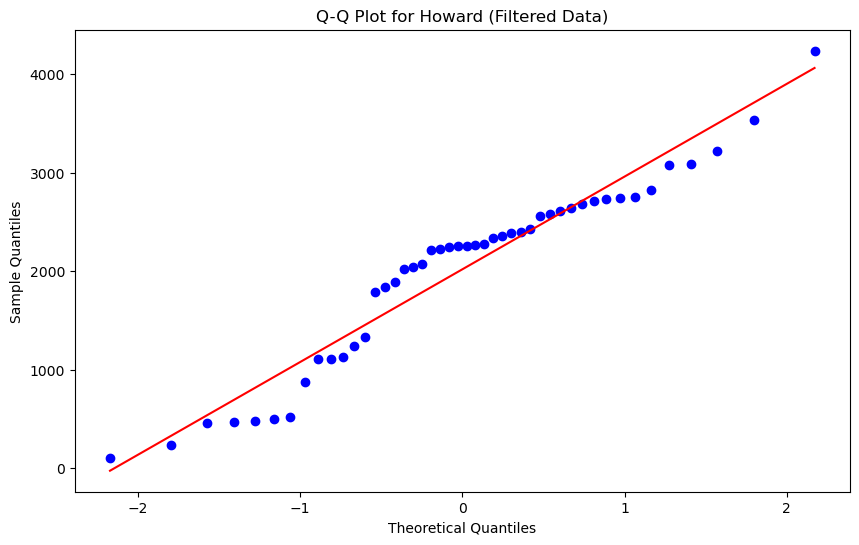

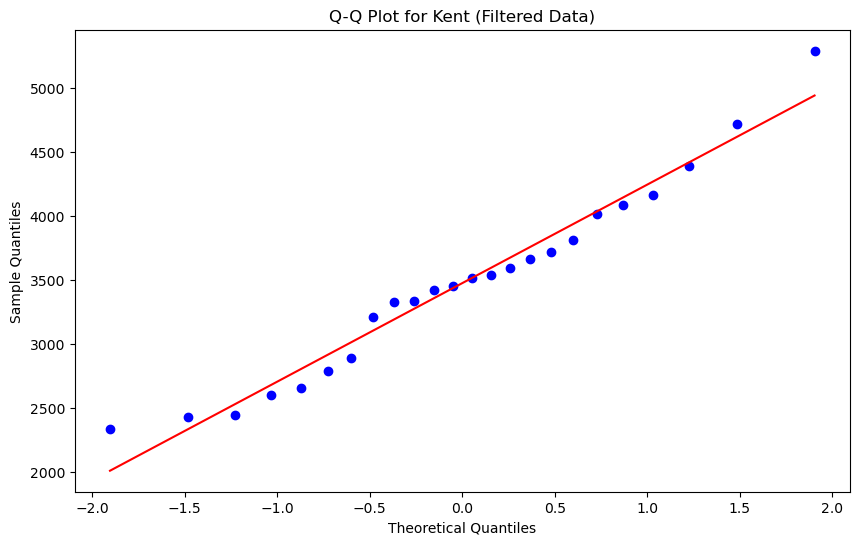

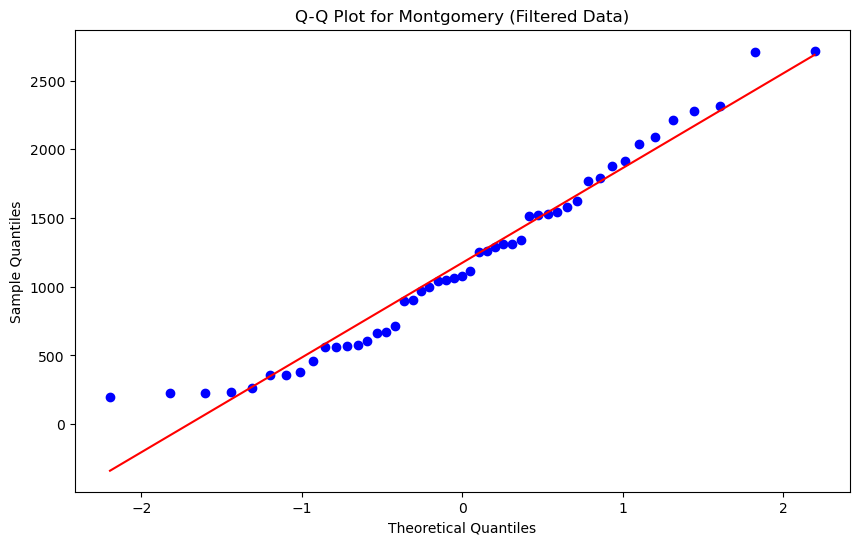

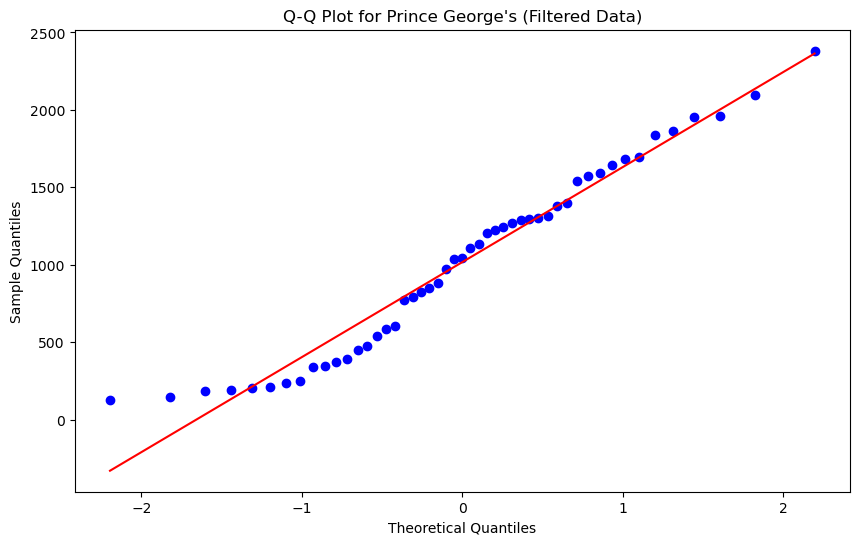

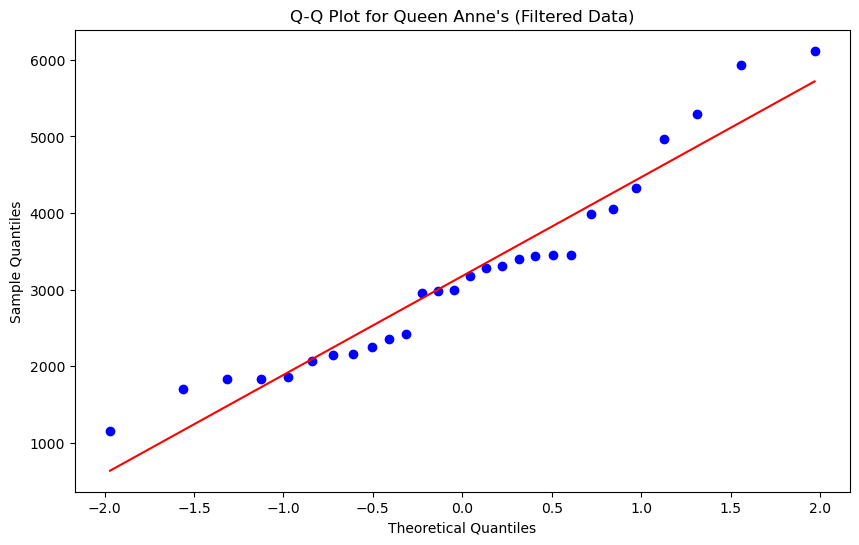

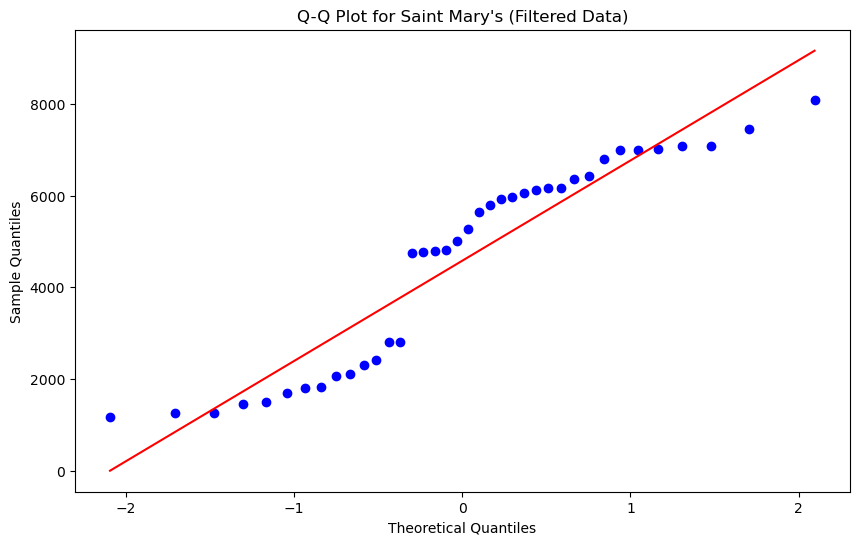

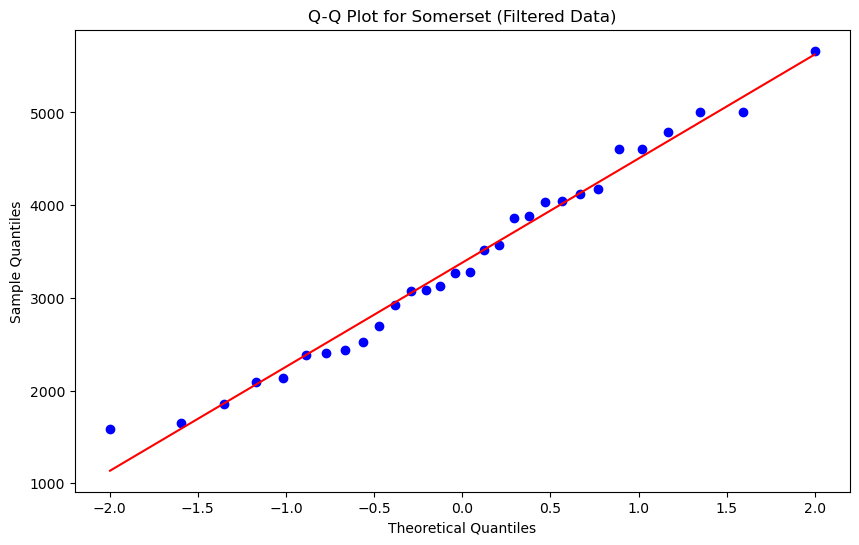

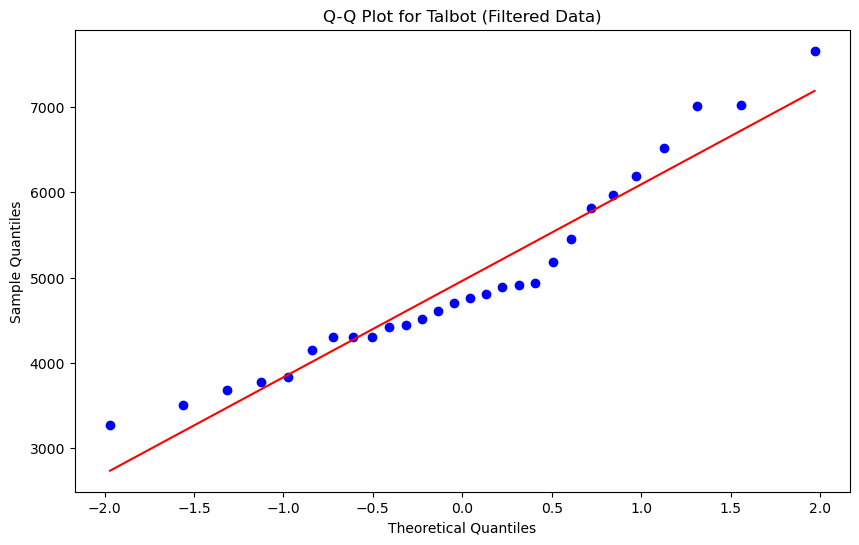

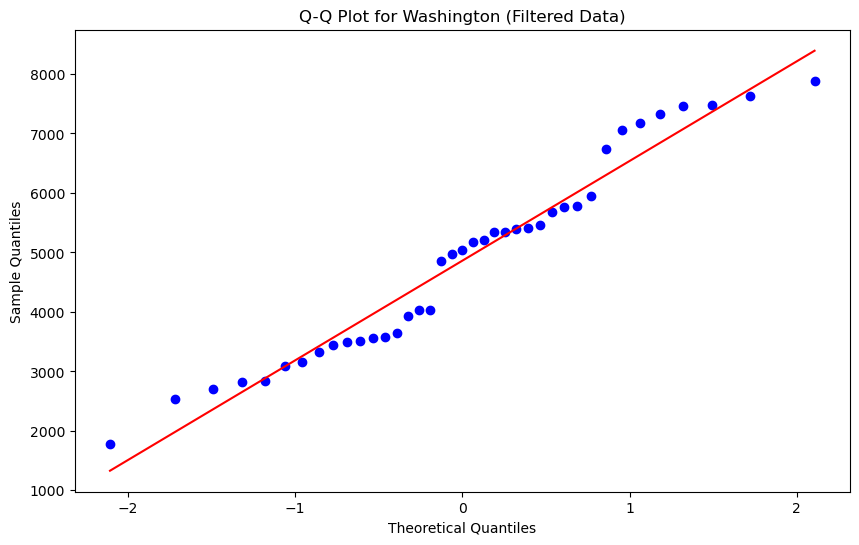

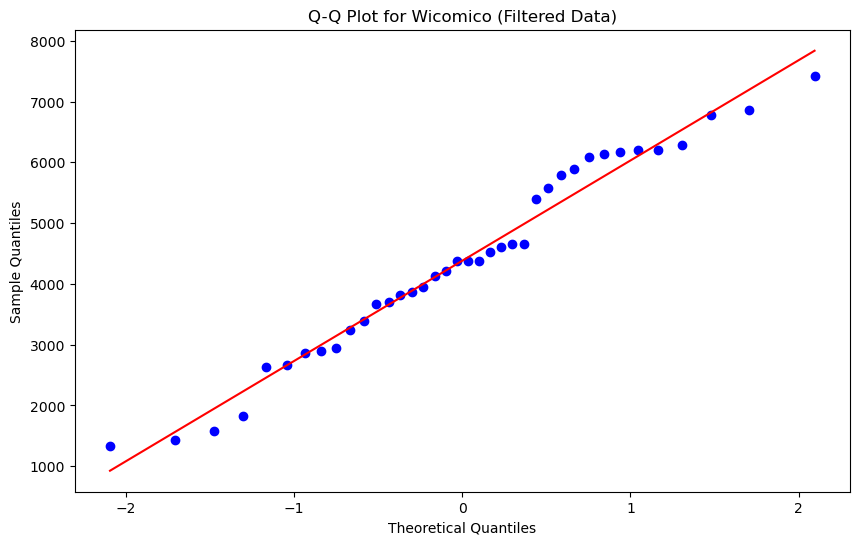

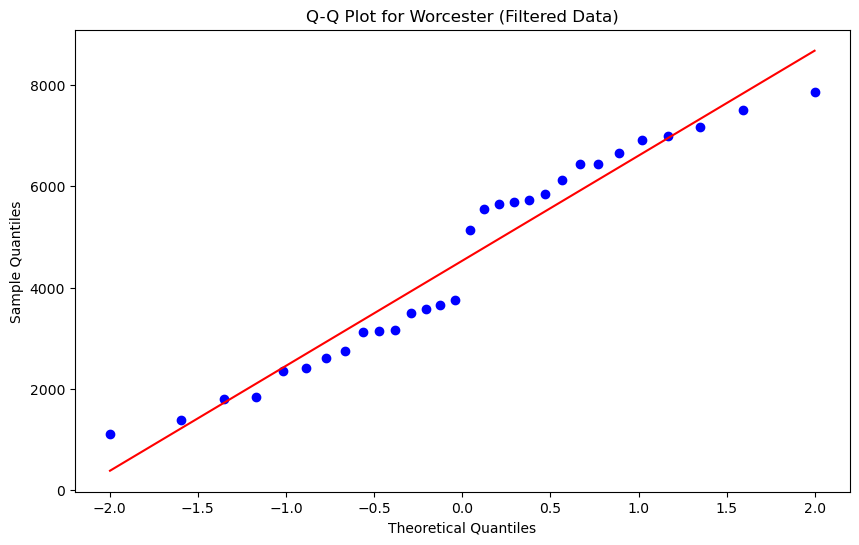

In [43]:
import matplotlib.pyplot as plt
import scipy.stats as stats
for jurisdiction, values in filtered_values_dict.items():
    # Generate a Q-Q plot to visually assess normality
    plt.figure(figsize=(10, 6))
    stats.probplot(values, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {jurisdiction} (Filtered Data)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()
    

Conditions Check:
1. Based on the graph of QQ plot, after exclude the outliers by using IQR,I found all the jurisdiction's value met normality condition assumption




In [ ]:
#Check independent: Simple random sample & Population size less than 10%
#No Pairing or Matching in Data
#No Duplicates



In [44]:
#Check for duplicates rows
duplicates = df.duplicated().sum()

print(duplicates)

0


In [ ]:
#So the two conditions are met next

In [ ]:
#Hypothesis H0: The Mean of outcome of the
#the vlue of Mental Health ED visits among the various 
#jurisdictions in Maryland for the year 2008~ 2017.

#H1: At least one mean is different among 
#the mental health-related ED visits among the various 
#jurisdictions in Maryland for the year 2008~2017.

In [ ]:
#calculate each jurisdiction's value's mean, and std

In [45]:
# Initialize dictionaries to store the mean and standard deviation for each jurisdiction
jurisdiction_mean_collection = {}
jurisdiction_std_collection = {}

# Loop through each unique jurisdiction in the DataFrame
for jurisdiction in df['Jurisdiction'].unique():
    # Extract value of mean for each jurisdiction
    jurisdiction_mean = df[df['Jurisdiction'] == jurisdiction]['Value'].mean()
    jurisdiction_std = df[df['Jurisdiction'] == jurisdiction]['Value'].std()
    
    # Store the mean and std in the respective collections
    jurisdiction_mean_collection[jurisdiction] = jurisdiction_mean
    jurisdiction_std_collection[jurisdiction] = jurisdiction_std

# The corrected line for standard deviation storage
jurisdiction_std_collection[jurisdiction] = jurisdiction_std

print(jurisdiction_mean_collection)
print(jurisdiction_std_collection)
    

{'State': 2211.1673469387756, 'Allegany': 2977.766666666667, 'Anne Arundel': 2737.577551020408, 'Baltimore City': 4339.81875, 'Baltimore County': 2172.4020408163265, 'Calvert': 2233.173333333333, 'Caroline': 5566.767741935484, 'Carroll': 3029.5848484848484, 'Cecil': 6450.989743589744, 'Charles': 1952.7030303030303, 'Dorchester': 8943.321212121213, 'Frederick': 2385.158695652174, 'Garrett': 4483.97, 'Harford': 2528.574358974359, 'Howard': 2018.2891304347827, 'Kent': 5316.086666666668, 'Montgomery': 1174.565306122449, "Prince George's": 1016.8183673469388, "Queen Anne's": 4009.4967741935484, "Saint Mary's": 4580.055263157895, 'Somerset': 3379.343333333333, 'Talbot': 5970.287096774194, 'Washington': 4860.302564102564, 'Wicomico': 4380.431578947368, 'Worcester': 4531.496666666667}
{'State': 1362.009246387446, 'Allegany': 984.3672973499037, 'Anne Arundel': 1663.1689036877394, 'Baltimore City': 2861.7374502033335, 'Baltimore County': 1373.4138919267618, 'Calvert': 694.4447406994004, 'Carolin

In [46]:
#ANOVA test to find significant difference of the value among all the jurisdications 
import scipy.stats as stats
# Create a list to hold the values for each jurisdiction
jurisdiction_values = [df[df['Jurisdiction'] == jurisdiction]['Value'].dropna()for jurisdiction in df["Jurisdiction"].unique()]
anova_result = stats.f_oneway(*jurisdiction_values)

print(anova_result)



F_onewayResult(statistic=22.231882638173246, pvalue=4.933921499720199e-75)


In [ ]:
# run a multiple-comparison t-test to find the genre pairs that are 
#significantly different from each other


The F-test shows that the P-value is 4.93 e-75, which means there is at least one mean significant different among others.

Find the racial difference of ED visits at maryland from 2008 ~ 2017

Null Hypothesis: there is not signifant differece of ED visits among all racial groups in maryland throughout 2008 ~ 2017

Alternative Hypothesis: There is at least one racial group that is significant different the rest of others

In [ ]:
#Clean the cells that contains NaN

In [47]:
nan_check = df['Value'].isna().sum()

df_cleaned = df.dropna(subset = ['Value'])
nan_check

df_cleaned.head(40)

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,4291.5,All races/ ethnicities (aggregated),2017,Mental Health ED visits
1,Allegany,3309.6,All races/ ethnicities (aggregated),2017,Mental Health ED visits
2,Anne Arundel,5734.1,All races/ ethnicities (aggregated),2017,Mental Health ED visits
3,Baltimore City,10093.5,All races/ ethnicities (aggregated),2017,Mental Health ED visits
4,Baltimore County,4210.1,All races/ ethnicities (aggregated),2017,Mental Health ED visits
5,Calvert,2999.1,All races/ ethnicities (aggregated),2017,Mental Health ED visits
6,Caroline,7556.2,All races/ ethnicities (aggregated),2017,Mental Health ED visits
7,Carroll,4216.0,All races/ ethnicities (aggregated),2017,Mental Health ED visits
8,Cecil,9584.2,All races/ ethnicities (aggregated),2017,Mental Health ED visits
9,Charles,2817.6,All races/ ethnicities (aggregated),2017,Mental Health ED visits


In [48]:
df_cleaned.head(60)
df_cleaned['Race/ ethnicity'].value_counts()

All races/ ethnicities (aggregated)     250
White Non-Hispanic                      225
Black Non-Hispanic                      216
Hispanic                                125
Asian/ Pacific Islander Non-Hispanic     68
White                                    25
Black                                    24
Asian/ Pacific Islander                   7
Name: Race/ ethnicity, dtype: int64

In [49]:
#create a list to hold total values for each racial group through 2008~2017
racial_groups = [df_cleaned[df_cleaned['Race/ ethnicity'] == Race]['Value'].values for Race in df_cleaned['Race/ ethnicity'].unique()]
racial_groups

[array([ 4291.5,  3309.6,  5734.1, 10093.5,  4210.1,  2999.1,  7556.2,
         4216. ,  9584.2,  2817.6, 11251.8,  3064.1,  7967.6,  3020.2,
         3082.1, 13662.1,  2312.1,  1955.6,  6119.5,  6173.1,  2696.1,
         7661.6,  5410.8,  2897.6,  3502.8,  3796.7,  2528.9,  5026.4,
         8551.8,  3653.8,  3194.3,  6651.8,  4058. ,  8684. ,  2834.6,
         7981.1,  2477.7,  7324.3,  2644.4,  2709.3,  9833. ,  2278.5,
         1861.6,  5293.5,  5804.2,  3265.9,  7028.9,  3511.1,  2863.5,
         3657. ,  2909. ,  3739.4,  3723.1,  5895.2,  2843.9,  2669.3,
         3742.9,  2949.5,  5172.7,  1661.2,  6809.6,  3415.5,  6367.1,
         2284.5,  2216.8,  4087.5,  1621. ,  1291.6,  3399.9,  4793.1,
         4035.8,  3510.6,  3555.4,  3949.9,  5680.7,  3442.6,  4722.9,
         4509.9,  6782. ,  2967.5,  2859.1,  4369.6,  3140.8,  5501.6,
         2346.9,  8551.1,  3892. ,  7826.4,  2853.4,  2613.8,  3590.3,
         1791.7,  1539.3,  3435.4,  7006.8,  5665.2,  4444.2,  5785.3,
      

In [50]:
race_ethnicity_grouped = df_cleaned.groupby('Race/ ethnicity')['Value'].sum()
race_ethnicity_grouped

Race/ ethnicity
All races/ ethnicities (aggregated)     1023711.9
Asian/ Pacific Islander                    3803.4
Asian/ Pacific Islander Non-Hispanic      32657.6
Black                                     89763.6
Black Non-Hispanic                       885299.4
Hispanic                                 318454.5
White                                     90320.0
White Non-Hispanic                       887730.4
Name: Value, dtype: float64

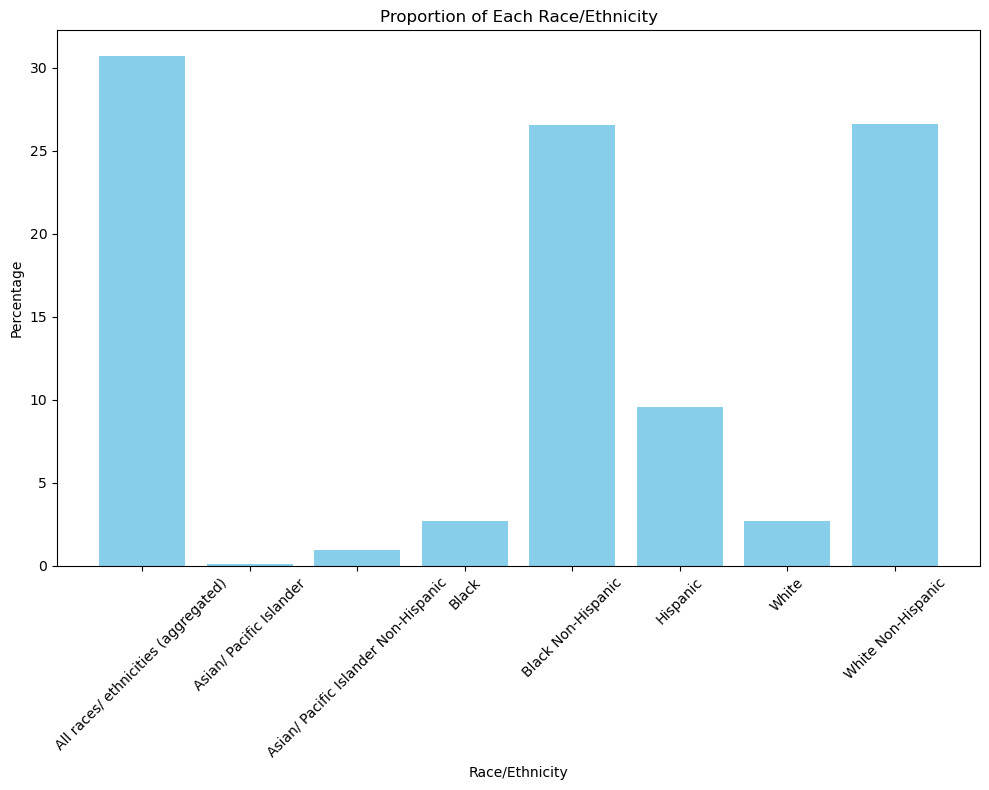

In [51]:

# Convert the dictionary to a pandas Series
race_ethnicity_series = pd.Series(race_ethnicity_grouped)

# Calculate percentages
race_ethnicity_percentage = (race_ethnicity_series / race_ethnicity_series.sum()) * 100

plt.figure(figsize=(10, 8))
plt.bar(race_ethnicity_percentage.index, race_ethnicity_percentage.values, color='skyblue')
plt.title('Proportion of Each Race/Ethnicity')
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

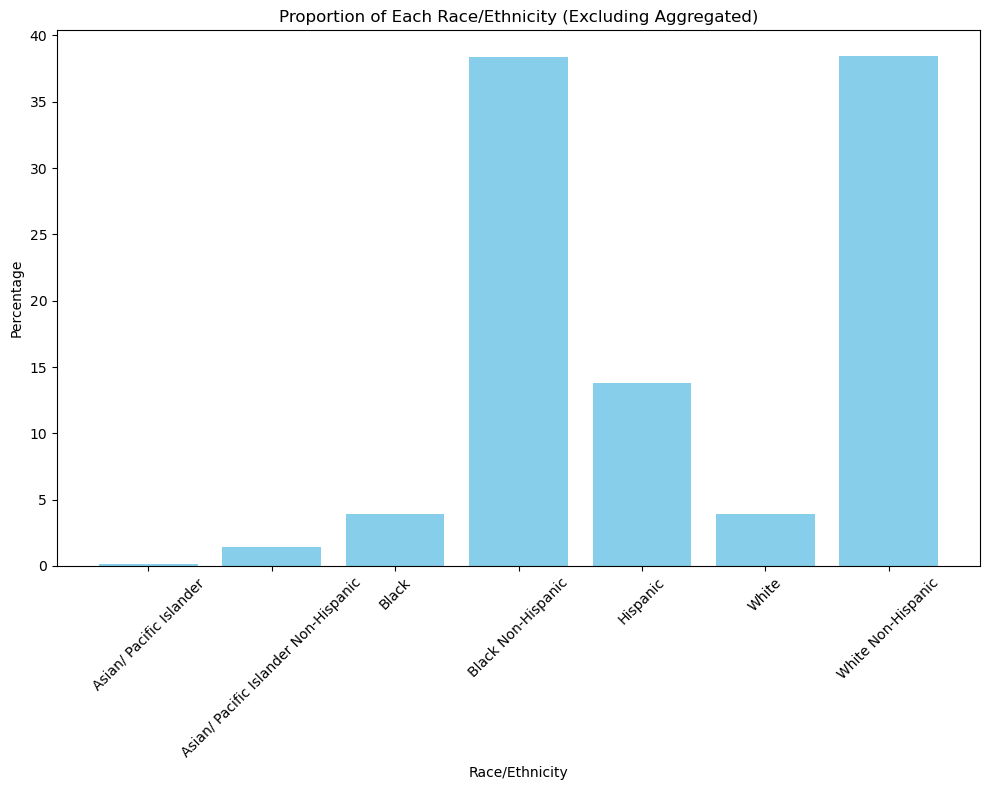

Asian/ Pacific Islander                   3803.4
Asian/ Pacific Islander Non-Hispanic     32657.6
Black                                    89763.6
Black Non-Hispanic                      885299.4
Hispanic                                318454.5
White                                    90320.0
White Non-Hispanic                      887730.4
dtype: float64


In [52]:
# Convert the dictionary to a pandas Series, excluding 'All races/ethnicities (aggregated)'
race_ethnicity_series = pd.Series({key: val for key, val in race_ethnicity_grouped.items() if key != 'All races/ ethnicities (aggregated)'})

# Calculate percentages
race_ethnicity_percentage = (race_ethnicity_series / race_ethnicity_series.sum()) * 100

# Plotting the bar chart without 'All races/ethnicities (aggregated)'
plt.figure(figsize=(10, 8))
plt.bar(race_ethnicity_percentage.index, race_ethnicity_percentage.values, color='skyblue')
plt.title('Proportion of Each Race/Ethnicity (Excluding Aggregated)')
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the percentages
race_ethnicity_percentage

print(race_ethnicity_series)

In [53]:
#Calculate F without counting all aggregrated groups
# Filter out the aggregated category
filtered_data = df_cleaned[df_cleaned['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)']

# Group the data by 'Race/ ethnicity' and get the list of values
grouped_values = [group['Value'].values for name, group in filtered_data.groupby('Race/ ethnicity')]

# Perform the ANOVA
anova_result = stats.f_oneway(*grouped_values)
print(anova_result)
                                                   


F_onewayResult(statistic=16.640741062942435, pvalue=5.790184483601274e-18)


In [54]:
#With All Aggregated groups
anova_result_race = stats.f_oneway(*racial_groups)
print(anova_result_race)

F_onewayResult(statistic=18.211208662901594, pvalue=8.438398995552402e-23)


#the trend of mental visits for all the racial groups from 2008~2017

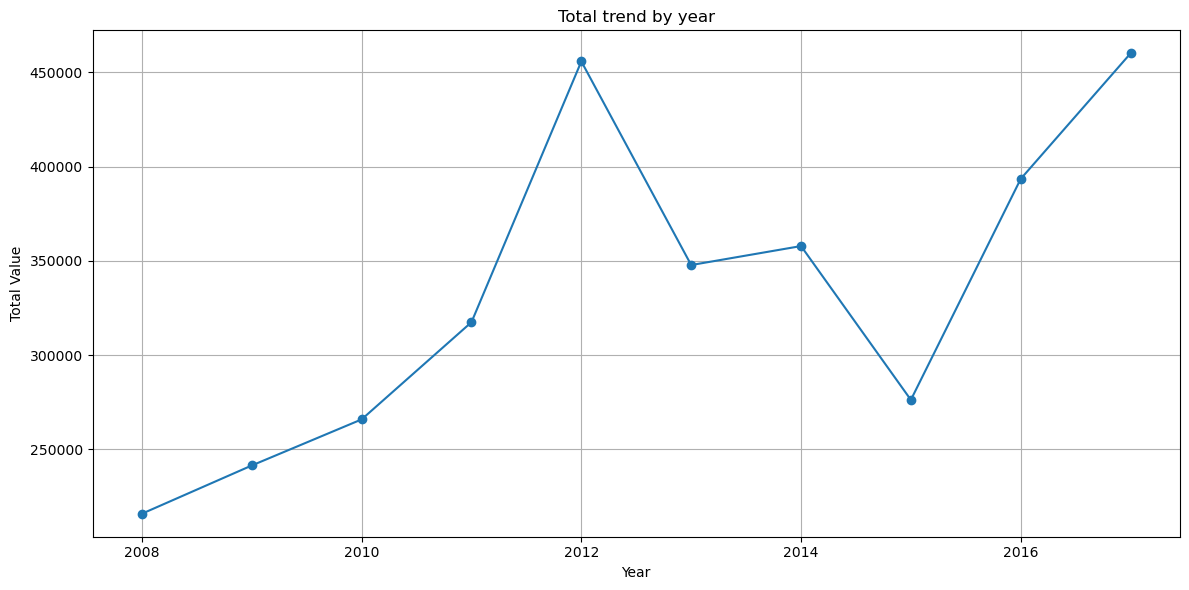

In [55]:
import matplotlib.pyplot as plt 
#histogram
year_value = df_cleaned.groupby('Year')['Value'].sum().reset_index()



plt.figure(figsize=(12, 6))
plt.plot(year_value['Year'], year_value['Value'], marker = 'o')
plt.title("Total trend by year")
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.grid(True)
plt.tight_layout()
plt.show()

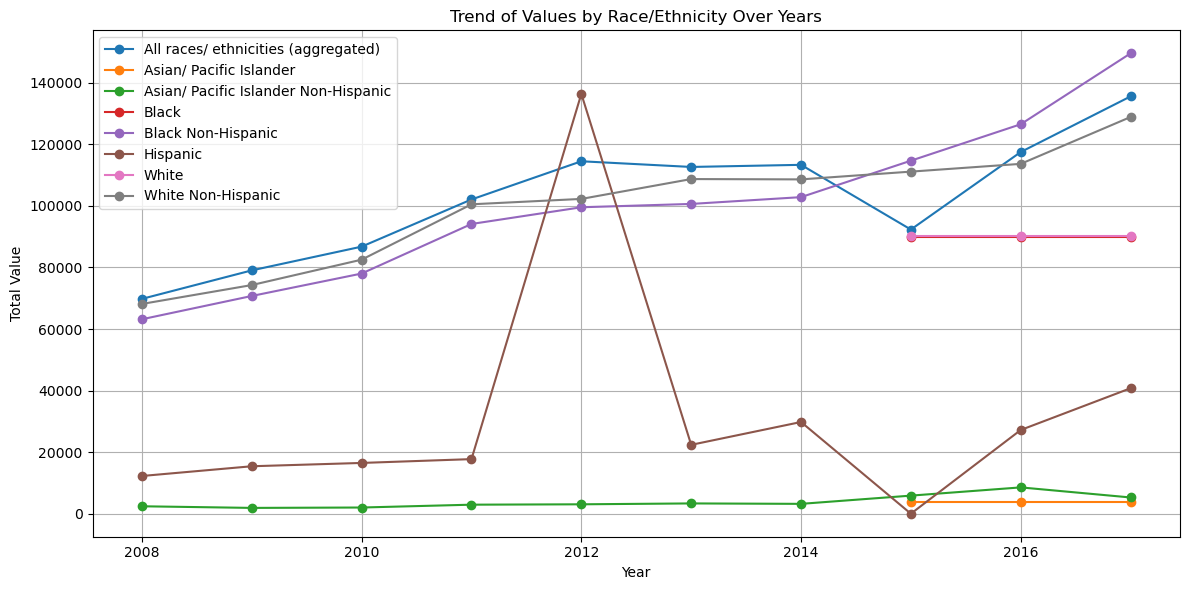

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has already been cleaned and prepared.
# Replace 'Race/ ethnicity' with the exact column name for race/ethnicity in your DataFrame.

# Convert 'Year' to a numeric type if it's not already.
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Create the pivot table.
pivot_data = df.pivot_table(index='Year', columns='Race/ ethnicity', values='Value', aggfunc='sum')

# Interpolate missing data points linearly.
pivot_data_interpolated = pivot_data.interpolate(method='linear', limit_direction='forward', axis=0)

# Now let's plot the data.
plt.figure(figsize=(12, 6))

for race in pivot_data_interpolated.columns:
    plt.plot(pivot_data_interpolated.index, pivot_data_interpolated[race], marker='o', label=race)

plt.title('Trend of Values by Race/Ethnicity Over Years')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/b_/zvz66r790cx4rcyvc01dc1h40000gn/T/ipykernel_3333/3774941495.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = pd.to_numeric(df_filtered['Year'], errors='coerce')


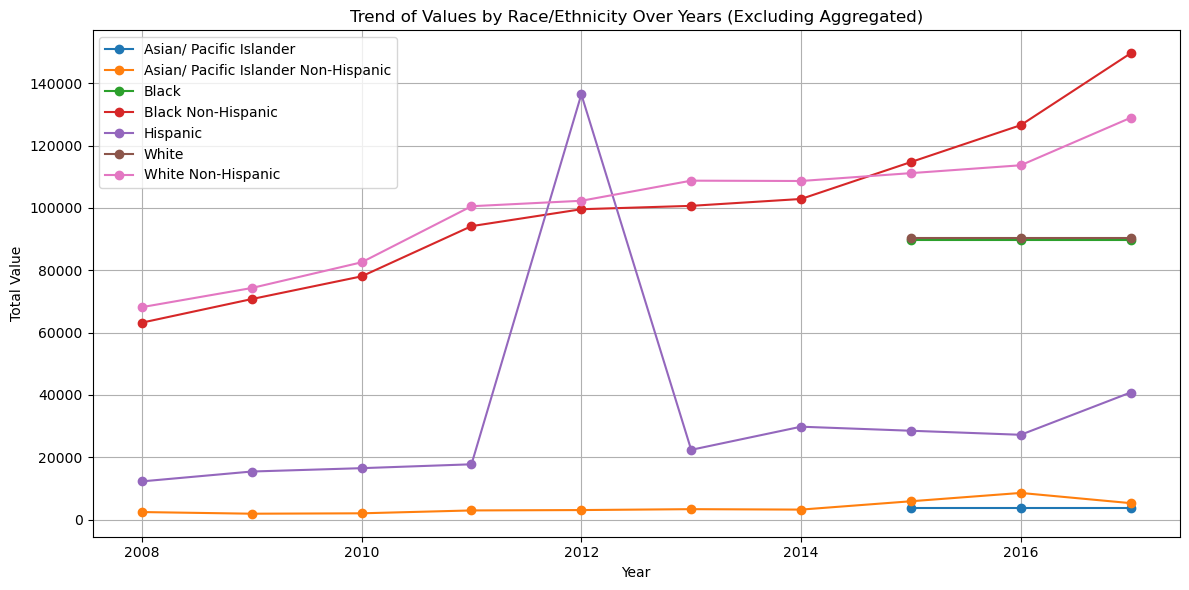

In [57]:
#Without counting aggregrated 

# Filter out "All races/ ethnicities (aggregated)"
df_filtered = df_cleaned[df_cleaned['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)']

# Convert 'Year' to a numeric type if it's not already.
df_filtered['Year'] = pd.to_numeric(df_filtered['Year'], errors='coerce')

# Create the pivot table.
pivot_data = df_filtered.pivot_table(index='Year', columns='Race/ ethnicity', values='Value', aggfunc='sum')

# Interpolate missing data points linearly.
pivot_data_interpolated = pivot_data.interpolate(method='linear', limit_direction='forward', axis=0)

# Now let's plot the data.
plt.figure(figsize=(12, 6))

for race in pivot_data_interpolated.columns:
    plt.plot(pivot_data_interpolated.index, pivot_data_interpolated[race], marker='o', label=race)

plt.title('Trend of Values by Race/Ethnicity Over Years (Excluding Aggregated)')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [345]:
# Filter for the 'White Non-Hispanic' race
data_white = df_cleaned[df_cleaned['Race/ ethnicity'] == 'White Non-Hispanic']

# Ensure the 'Year' column is numeric
data_white['Year'] = pd.to_numeric(data_white['Year'], errors='coerce')

# Check if there are any entries for 2008 and 2017
if not ((data_white['Year'] == 2008).any() and (data_white['Year'] == 2016).any()):
    raise ValueError("Data for the years 2008 or 2017 is not available.")

# Get the sum of ED visits for the first year (2008) and the last year (2017)
initial_value = data_white[data_white['Year'] == 2008]['Value'].sum()  # The value in the first year
final_value = data_white[data_white['Year'] == 2017]['Value'].sum()   # The value in the last year

# Handle cases where initial_value is 0 or NaN
if initial_value == 0 or np.isnan(initial_value):
    raise ValueError("Initial value is zero or NaN, cannot compute percentage increase.")

# Calculate the percentage increase
percentage_increase = ((final_value - initial_value) / initial_value) * 100

percentage_increase 

ValueError: Data for the years 2008 or 2017 is not available.

In [ ]:
# Filter for the 'Black' race
data_white = df_cleaned[df_cleaned['Race/ ethnicity'] == 'B']

# Get the sum of ED visits for the first year (2008) and the last year (2017)
initial_value = data_white[data_white['Year'] == 2008]['Value'].sum()  # The value in the first year
final_value = data_white[data_white['Year'] == 2017]['Value'].sum()   # The value in the last year

# Calculate the percentage increase
percentage_increase = ((final_value - initial_value) / initial_value) * 100
percentage_increase 

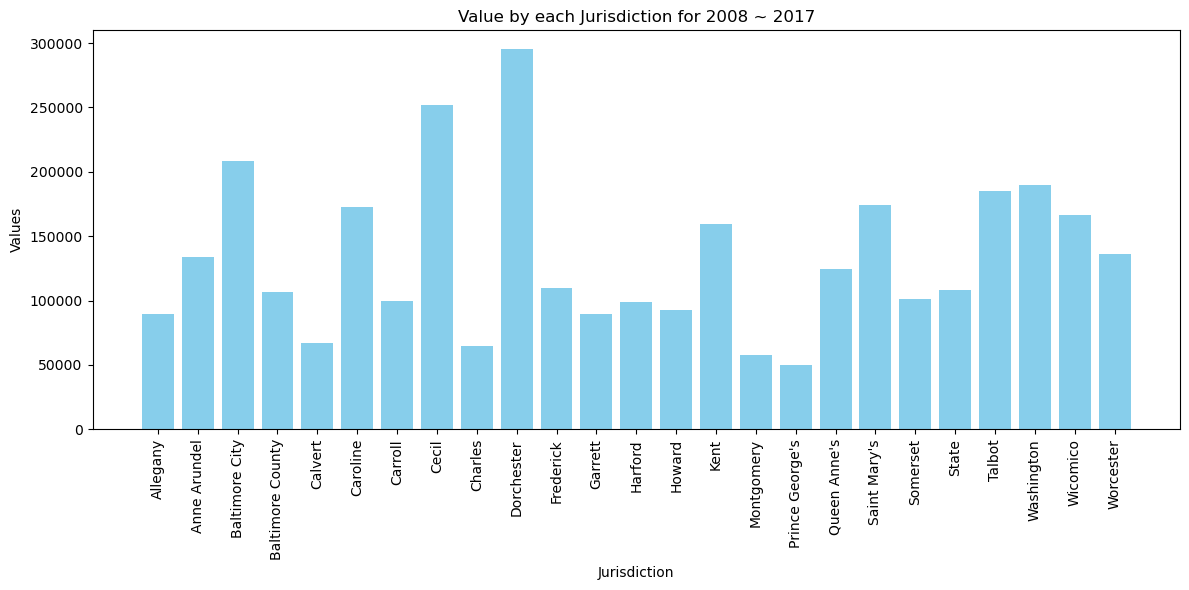

In [58]:
# Analysis Regional data
#Trend of each Jurisdication visit 

jurisdiction_value = df_cleaned.groupby('Jurisdiction')['Value'].sum()
jurisdiction_each = df_cleaned.groupby('Jurisdiction')

plt.figure(figsize=(12, 6))
plt.bar(jurisdiction_value.index, jurisdiction_value.values, color = 'skyblue')  # Plot with markers for each data point
plt.title('Value by each Jurisdiction for 2008 ~ 2017')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.ylabel('Values')
plt.xlabel('Jurisdiction')
plt.tight_layout()  # Call this as a function with parentheses
plt.show()

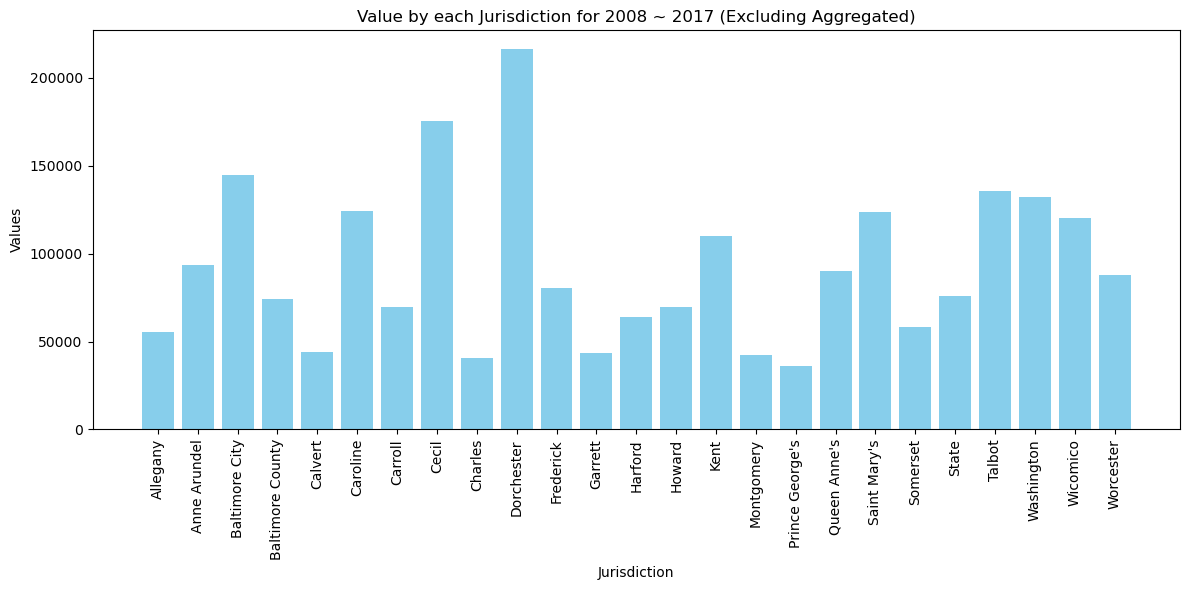

In [59]:
#without Counting the "All Aggregate"
# Filter the data to exclude 'All races/ ethnicities (aggregated)'
jurisdiction_data = df_cleaned[df_cleaned['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)']

# Summing values for each jurisdiction
jurisdiction_value = jurisdiction_data.groupby('Jurisdiction')['Value'].sum()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(jurisdiction_value.index, jurisdiction_value.values, color='skyblue')
plt.title('Value by each Jurisdiction for 2008 ~ 2017 (Excluding Aggregated)')
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.xlabel('Jurisdiction')
plt.tight_layout()
plt.show()

So the least mental ER visits are in Prince George, Montgomery, Charles, and calvert.
They have the least vists among the other jurisdications in the the Maryland could be because of
1. They might not have large population as other jurisdictions
2. They might not have as many ER as other jurisdictions
3. They might have more racie than they others
4. What are the racial composites look like in the list ER visits juridiction

What are the other ER visits racially composite look like? 
1. are there a common racial group visit ratio more ER than the other across all the jurisdictions?



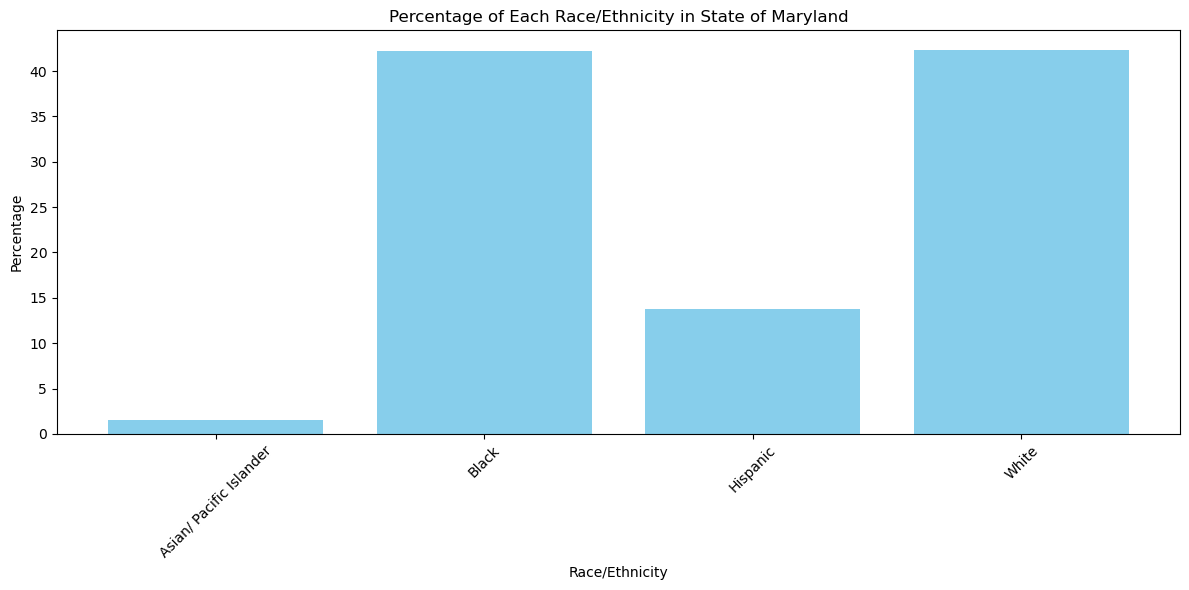

In [288]:
# ED visits by race in state level 


race_sum_general = df_cleaned[df_cleaned['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)'].groupby('Race/ ethnicity')['Value'].sum()
total_sum_general = race_sum_general.sum()

race_percentage_general = (race_sum_general / total_sum_general) * 100

# Now you can plot the percentages using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(race_percentage_general.index, race_percentage_general.values, color='skyblue')
plt.title("Percentage of Each Race/Ethnicity in State of Maryland")
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

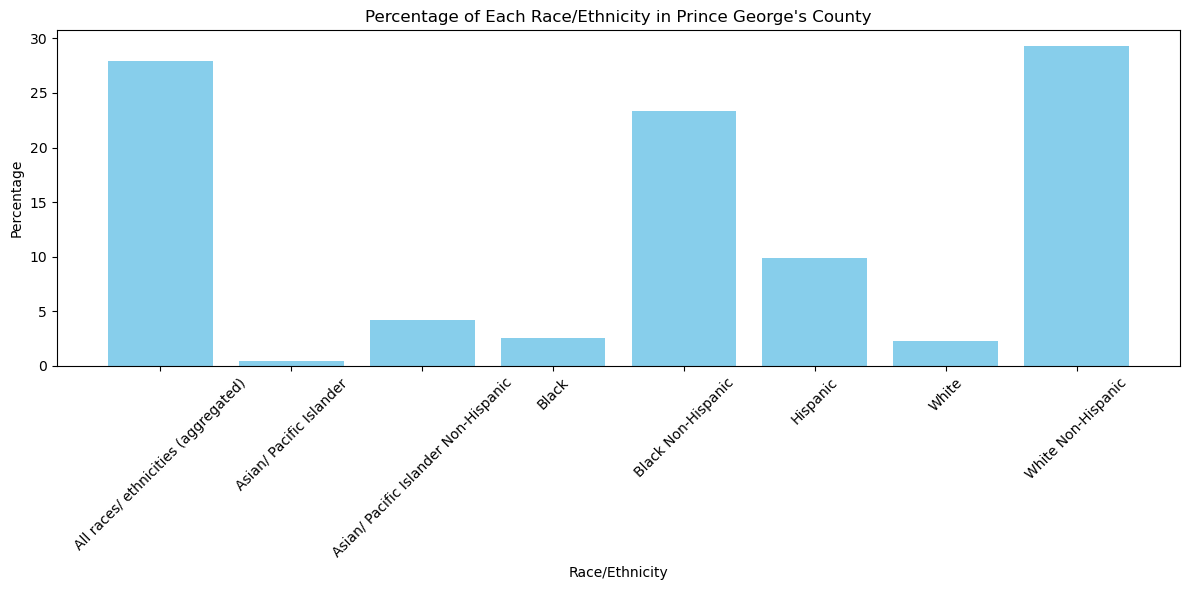

In [60]:
# for last 10 year, find the ER visits in the Prince George, what is the racial composite?
prince_george_data = df_cleaned[df_cleaned['Jurisdiction'] == "Prince George's"].dropna(subset=['Value'])
race_sum = prince_george_data.groupby('Race/ ethnicity')['Value'].sum()
total_sum = race_sum.sum()
 
race_percentage = (race_sum/total_sum) * 100
# Now you can plot the percentages using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(race_percentage.index, race_percentage.values, color='skyblue')
plt.title("Percentage of Each Race/Ethnicity in Prince George's County")
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

In [61]:
#One-Way Anova to find if there are significances
#ANOVA test
import scipy.stats as stats



# Assuming that 'Value' column contains individual observations
# Perform ANOVA
anova_result_no_Agg = stats.f_oneway(
    #prince_george_data[prince_george_data['Race/ ethnicity'] == 'All races/ ethnicities (aggregated)']['Value'],
    prince_george_data[prince_george_data['Race/ ethnicity'] == 'Asian/ Pacific Islander']['Value'],
    prince_george_data[prince_george_data['Race/ ethnicity'] == 'Black']['Value'],
    prince_george_data[prince_george_data['Race/ ethnicity'] == 'Black Non-Hispanic']['Value'],
    prince_george_data[prince_george_data['Race/ ethnicity'] == 'Hispanic']['Value'],
    prince_george_data[prince_george_data['Race/ ethnicity'] == 'White']['Value'],
    prince_george_data[prince_george_data['Race/ ethnicity'] == 'White Non-Hispanic']['Value']
    
)


anova_result_no_Agg

F_onewayResult(statistic=9.377660402776788, pvalue=4.690565582723657e-05)

In [62]:
# which one is significance from each other
import statsmodels.stats.multicomp as multi

PG_no_Agg = prince_george_data[prince_george_data['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)']
tukey_PG = multi.pairwise_tukeyhsd(endog=PG_no_Agg['Value'],
                                  groups=PG_no_Agg['Race/ ethnicity'],
                                  alpha = 0.05)

tukey_PG.summary()


tukey_results_df = pd.DataFrame(data=tukey_PG._results_table.data[1:], columns=tukey_PG._results_table.data[0])

# Filter the results where the null hypothesis is rejected
PG_Rejected = tukey_results_df[tukey_results_df['reject'] == True]

PG_Rejected.head(26)

,group1,group2,meandiff,p-adj,lower,upper,reject
5,Asian/ Pacific Islander,White Non-Hispanic,1370.9000,0.0051,307.2534,2434.5466,True
6,Asian/ Pacific Islander Non-Hispanic,Black,1065.3556,0.0494,1.7090,2129.0021,True
7,Asian/ Pacific Islander Non-Hispanic,Black Non-Hispanic,1058.5667,0.0000,582.8895,1534.2439,True
10,Asian/ Pacific Islander Non-Hispanic,White Non-Hispanic,1387.9556,0.0000,912.2783,1863.6328,True
15,Black Non-Hispanic,Hispanic,-746.0778,0.0004,-1221.7550,-270.4006,True
19,Hispanic,White Non-Hispanic,1075.4667,0.0000,599.7895,1551.1439,True


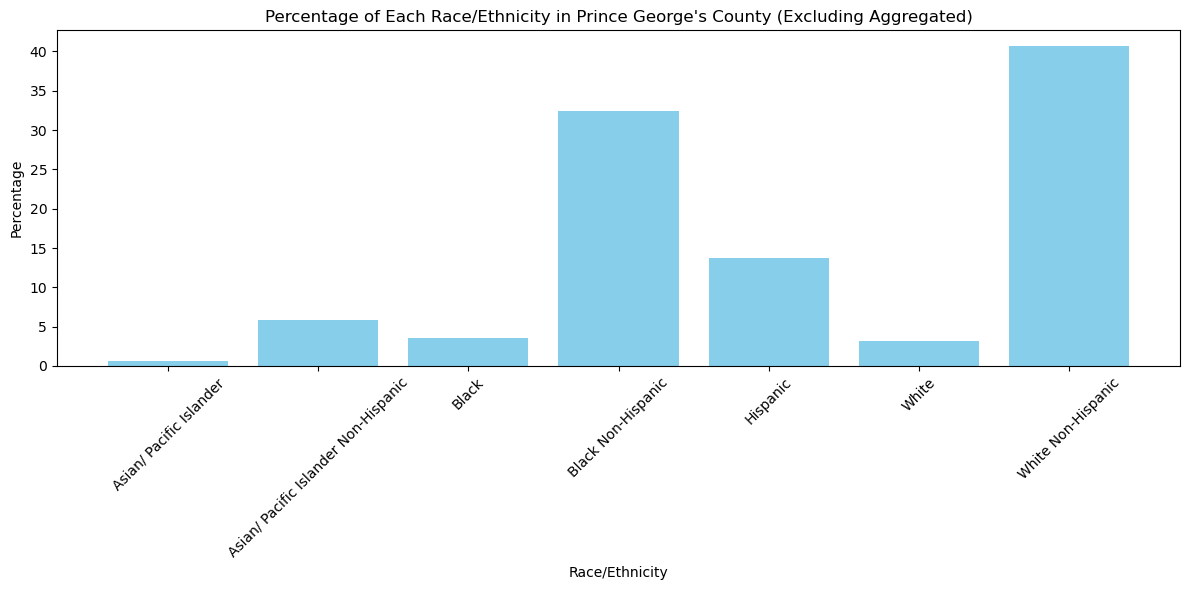

In [64]:
# Without Counting the Aggregrated Data


#Assuming df_cleaned is the DataFrame with the required data
# Excluding 'All races/ ethnicities (aggregated)' from the analysis

# Filter the data to exclude 'All races/ ethnicities (aggregated)'
prince_george_data_1 = df_cleaned[(df_cleaned['Jurisdiction'] == "Prince George's") & 
                                (df_cleaned['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)')].dropna(subset=['Value'])

# Summing values for each race/ethnicity
race_sum = prince_george_data_1.groupby('Race/ ethnicity')['Value'].sum()
total_sum = race_sum.sum()

# Calculate percentages
race_percentage_1 = (race_sum / total_sum) * 100

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(race_percentage_1.index, race_percentage_1.values, color='skyblue')
plt.title("Percentage of Each Race/Ethnicity in Prince George's County (Excluding Aggregated)")
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


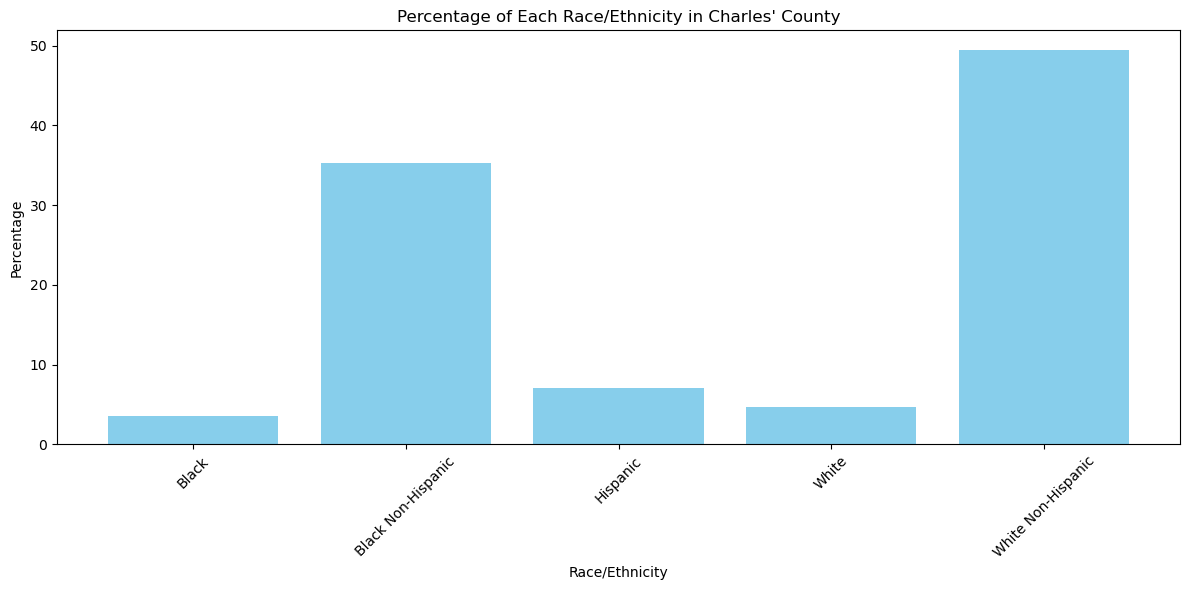

In [65]:
#without Agg

CLS_data_no_Agg = df_cleaned[(df_cleaned['Jurisdiction'] == "Charles") & 
                                (df_cleaned['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)')].dropna(subset=['Value'])

# for last 10 year, find the ER visits in the Prince George, what is the racial composite?
#CLS_data = df_cleaned[df_cleaned['Jurisdiction'] == "Charles"].dropna(subset=['Value'])
CLS_race_sum = CLS_data_no_Agg.groupby('Race/ ethnicity')['Value'].sum()
CLS_total_sum = CLS_race_sum.sum()
 
CLS_race_percentage = (CLS_race_sum/CLS_total_sum) * 100
# Now you can plot the percentages using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(CLS_race_percentage.index, CLS_race_percentage.values, color='skyblue')
plt.title("Percentage of Each Race/Ethnicity in Charles' County")
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

In [70]:
anova_result = stats.f_oneway(
    #CLS_data[CLS_data['Race/ ethnicity'] == 'All races/ ethnicities (aggregated)']['Value'],
    #CLS_data[CLS_data['Race/ ethnicity'] == 'Asian/ Pacific Islander']['Value'],
    CLS_data_no_Agg[CLS_data_no_Agg['Race/ ethnicity'] == 'Black']['Value'],
    CLS_data_no_Agg[CLS_data_no_Agg['Race/ ethnicity'] == 'Black Non-Hispanic']['Value'],
    CLS_data_no_Agg[CLS_data_no_Agg['Race/ ethnicity'] == 'Hispanic']['Value'],
    CLS_data_no_Agg[CLS_data_no_Agg['Race/ ethnicity'] == 'White']['Value'],
    CLS_data_no_Agg[CLS_data_no_Agg['Race/ ethnicity'] == 'White Non-Hispanic']['Value']
    
)

anova_result

F_onewayResult(statistic=2.174668833052063, pvalue=0.11315921076612379)

In [72]:
# which one is significance from each other
import statsmodels.stats.multicomp as multi
tukey_CLS = multi.pairwise_tukeyhsd(endog=CLS_data_no_Agg['Value'],
                                  groups=CLS_data_no_Agg['Race/ ethnicity'],
                                  alpha = 0.05)

summery_CLS=tukey_CLS.summary()


tukey_results_df = pd.DataFrame(data=tukey_CLS._results_table.data[1:], columns=tukey_CLS._results_table.data[0])

# Filter the results where the null hypothesis is rejected
CLS_Rejected = tukey_results_df[tukey_results_df['reject'] == True]

CLS_Rejected.head(26)

print(summery_CLS)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
      group1             group2        meandiff p-adj    lower      upper   reject
----------------------------------------------------------------------------------
             Black Black Non-Hispanic  143.9222 0.9996 -2082.0898 2369.9343  False
             Black           Hispanic -481.8333 0.9737 -2920.3074 1956.6407  False
             Black              White     451.7 0.9902 -2534.8086 3438.2086  False
             Black White Non-Hispanic     781.3 0.8234 -1444.7121 3007.3121  False
Black Non-Hispanic           Hispanic -625.7556 0.6687 -2033.6092  782.0981  False
Black Non-Hispanic              White  307.7778  0.993 -1918.2343 2533.7898  False
Black Non-Hispanic White Non-Hispanic  637.3778 0.3349  -358.1251 1632.8806  False
          Hispanic              White  933.5333 0.7744 -1504.9407 3372.0074  False
          Hispanic White Non-Hispanic 1263.1333 0.0912  -144.7203  2670.987  False
    

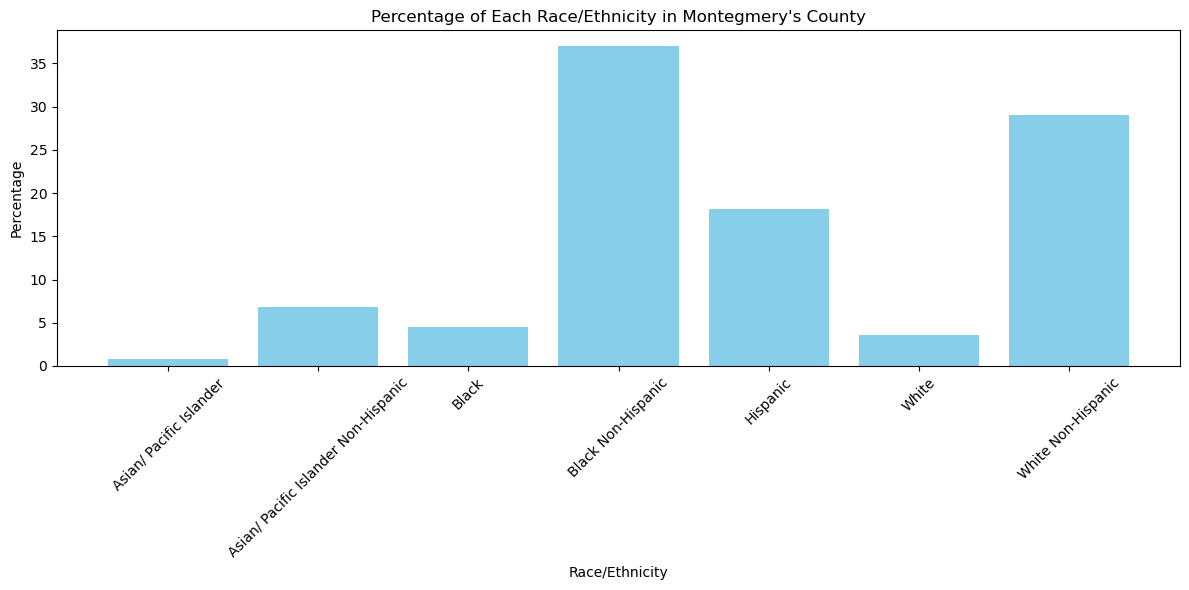

In [84]:
#no Agg

MG_data_no_Ag = df_cleaned[(df_cleaned['Jurisdiction'] == "Montgomery") & 
                            (df_cleaned['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)')].dropna(subset=['Value'])

# for last 10 year, find the ER visits in the MG, what is the racial composite?
#MG_data = df_cleaned[df_cleaned['Jurisdiction'] == "Montgomery"].dropna(subset=['Value'])
MG_race_sum = MG_data_no_Agg.groupby('Race/ ethnicity')['Value'].sum()
MG_total_sum = MG_race_sum.sum()
 
MG_race_percentage = (MG_race_sum/MG_total_sum) * 100
# Now you can plot the percentages using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(MG_race_percentage.index, MG_race_percentage.values, color='skyblue')
plt.title("Percentage of Each Race/Ethnicity in Montegmery's County")
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

In [85]:
anova_result = stats.f_oneway(
    #CLS_data[CLS_data['Race/ ethnicity'] == 'All races/ ethnicities (aggregated)']['Value'],
    MG_data_no_Ag[MG_data_no_Ag['Race/ ethnicity'] == 'Asian/ Pacific Islander']['Value'],
    MG_data_no_Ag[MG_data_no_Ag['Race/ ethnicity'] == 'Black']['Value'],
    MG_data_no_Ag[MG_data_no_Ag['Race/ ethnicity'] == 'Black Non-Hispanic']['Value'],
    MG_data_no_Ag[MG_data_no_Ag['Race/ ethnicity'] == 'Hispanic']['Value'],
    MG_data_no_Ag[MG_data_no_Ag['Race/ ethnicity'] == 'White']['Value'],
    MG_data_no_Ag[MG_data_no_Ag['Race/ ethnicity'] == 'White Non-Hispanic']['Value']
    
)

anova_result

F_onewayResult(statistic=3.328286328961857, pvalue=0.020073723460763422)

In [88]:
# which one is significance from each other
import statsmodels.stats.multicomp as multi
tukey_MG = multi.pairwise_tukeyhsd(endog=MG_data_no_Ag['Value'],
                                  groups=MG_data_no_Ag['Race/ ethnicity'],
                                  alpha = 0.05)

summery_MG=tukey_MG.summary()


tukey_results_df = pd.DataFrame(data=tukey_MG._results_table.data[1:], columns=tukey_MG._results_table.data[0])

# Filter the results where the null hypothesis is rejected
MG_Rejected = tukey_results_df[tukey_results_df['reject'] == True]

MG_Rejected.head(26)


,group1,group2,meandiff,p-adj,lower,upper,reject
6,Asian/ Pacific Islander Non-Hispanic,Black,1595.5889,0.0431,31.6845,3159.4933,True
7,Asian/ Pacific Islander Non-Hispanic,Black Non-Hispanic,1412.9222,0.0000,713.5229,2112.3215,True
10,Asian/ Pacific Islander Non-Hispanic,White Non-Hispanic,1038.6333,0.0009,339.2340,1738.0326,True
15,Black Non-Hispanic,Hispanic,-883.8111,0.0063,-1583.2104,-184.4118,True


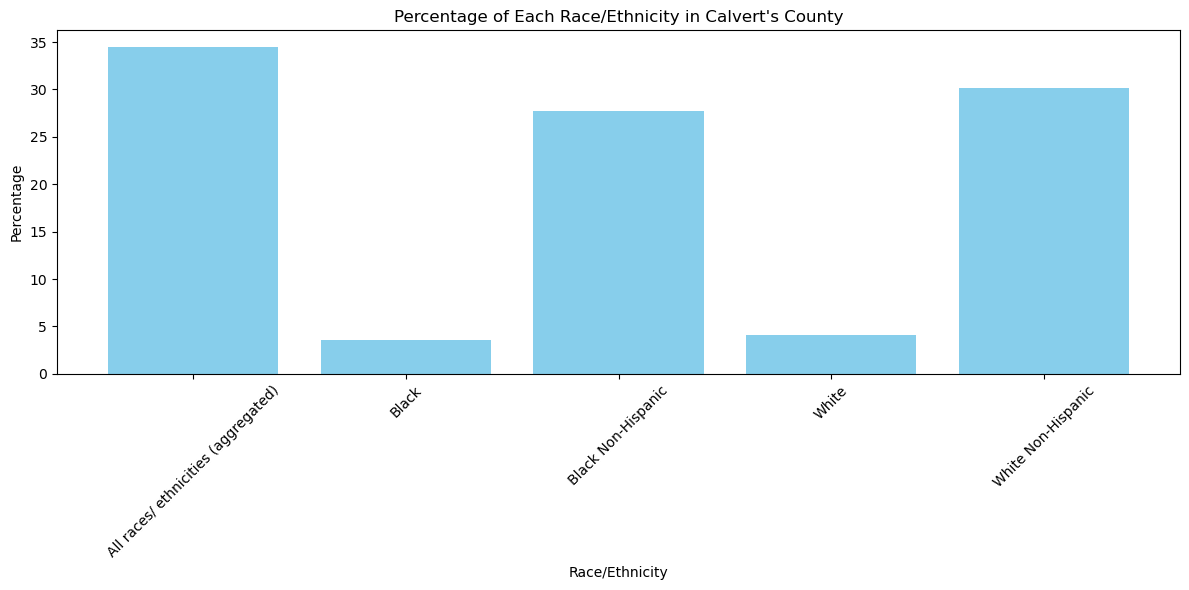

In [75]:
# for last 10 year, find the ER visits in the Prince George, what is the racial composite?
calvert_data = df_cleaned[df_cleaned['Jurisdiction'] == "Calvert"]
calvert_race_sum =calvert_data.groupby('Race/ ethnicity')['Value'].sum()
calvert_total_sum = calvert_race_sum.sum()
 
calvert_race_percentage = (calvert_race_sum/calvert_total_sum) * 100
# Now you can plot the percentages using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(calvert_race_percentage.index, calvert_race_percentage.values, color='skyblue')
plt.title("Percentage of Each Race/Ethnicity in Calvert's County")
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

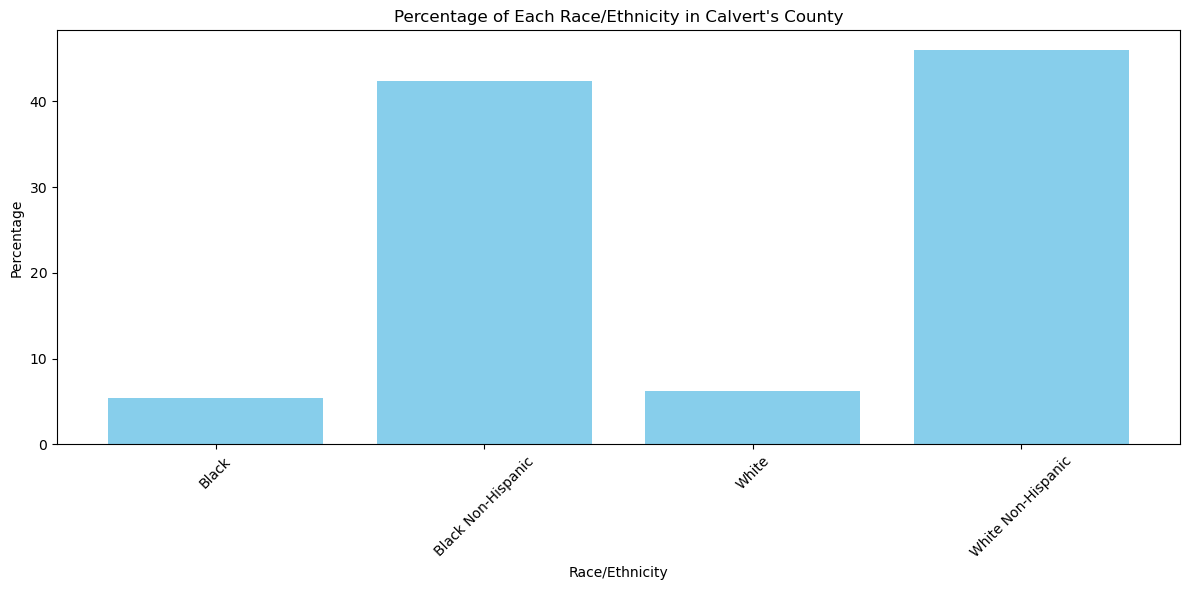

In [76]:
#no Agg

CLT_data_no_Agg = df_cleaned[(df_cleaned['Jurisdiction'] == "Calvert") & 
                            (df_cleaned['Race/ ethnicity'] != 'All races/ ethnicities (aggregated)')].dropna(subset=['Value'])

# for last 10 year, find the ER visits in the MG, what is the racial composite?
#MG_data = df_cleaned[df_cleaned['Jurisdiction'] == "Montgomery"].dropna(subset=['Value'])
CLT_race_sum = CLT_data_no_Agg.groupby('Race/ ethnicity')['Value'].sum()
CLT_total_sum = CLT_race_sum.sum()
 
CLT_race_percentage = (CLT_race_sum/CLT_total_sum) * 100
# Now you can plot the percentages using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(CLT_race_percentage.index, CLT_race_percentage.values, color='skyblue')
plt.title("Percentage of Each Race/Ethnicity in Calvert's County")
plt.ylabel('Percentage')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

In [78]:
anova_result = stats.f_oneway(
    #CLS_data[CLS_data['Race/ ethnicity'] == 'All races/ ethnicities (aggregated)']['Value'],
    #CLT_data[CLT_data['Race/ ethnicity'] == 'Asian/ Pacific Islander']['Value'],
    calvert_data[calvert_data['Race/ ethnicity'] == 'Black']['Value'],
    calvert_data[calvert_data['Race/ ethnicity'] == 'Black Non-Hispanic']['Value'],
    #CLT_data[CLT_data['Race/ ethnicity'] == 'Hispanic']['Value'],
    calvert_data[calvert_data['Race/ ethnicity'] == 'White']['Value'],
    calvert_data[calvert_data['Race/ ethnicity'] == 'White Non-Hispanic']['Value']
    
)

anova_result

F_onewayResult(statistic=0.2901538968539146, pvalue=0.8318632028478044)

In [77]:
# which one is significance from each other
import statsmodels.stats.multicomp as multi
tukey_CLT = multi.pairwise_tukeyhsd(endog=calvert_data['Value'],
                                  groups=calvert_data['Race/ ethnicity'],
                                  alpha = 0.05)

summery_CLT=tukey_CLT.summary()


tukey_results_df = pd.DataFrame(data=tukey_CLT._results_table.data[1:], columns=tukey_CLT._results_table.data[0])

# Filter the results where the null hypothesis is rejected
CLT_Rejected = tukey_results_df[tukey_results_df['reject'] == True]

CLT_Rejected.head(26)



,group1,group2,meandiff,p-adj,lower,upper,reject


In [ ]:
df_population = pd.read_excel('/Users/liushuyuan/Desktop/Dario/iSchool/INST627/Maryland_DemographicsByCounty_sample.xlsx')

csv_file_path = '/Users/liushuyuan/Desktop/Dario/iSchool/INST627/Maryland_DemographicsByCounty_sample.csv'
df_population.to_csv(csv_file_path, index=False)
df_population.head(60)

#Load the educational data in maryland and analysis maryland 

In [138]:
import statsmodels.api as sm

edu_data = pd.read_csv('/Users/liushuyuan/Desktop/Dario/iSchool/INST627/Enrollments by Gender and Races.csv')
edu_data = pd.get_dummies(edu_data, columns=['ID IPEDS Race'],drop_first=True)
edu_data.head()
race_edu_data = edu_data.groupby('IPEDS Race').sum()
race_edu_data.head(20)
edu_data.head(50)

/var/folders/b_/zvz66r790cx4rcyvc01dc1h40000gn/T/ipykernel_3333/1334126354.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_edu_data = edu_data.groupby('IPEDS Race').sum()


,ID Gender,Gender,IPEDS Race,ID Year,Year,Enrollment,Geography,ID Geography,Slug Geography,ID IPEDS Race_black,ID IPEDS Race_hawaiian,ID IPEDS Race_hispanic,ID IPEDS Race_multiracial,ID IPEDS Race_native,ID IPEDS Race_nonresident,ID IPEDS Race_unknown,ID IPEDS Race_white
0,1,Men,Asian,2021,2021,13978,Maryland,04000US24,maryland,0,0,0,0,0,0,0,0
1,1,Men,Black or African American,2021,2021,33258,Maryland,04000US24,maryland,1,0,0,0,0,0,0,0
2,1,Men,Native Hawaiian or Other Pacific Islanders,2021,2021,346,Maryland,04000US24,maryland,0,1,0,0,0,0,0,0
3,1,Men,Hispanic or Latino,2021,2021,15916,Maryland,04000US24,maryland,0,0,1,0,0,0,0,0
4,1,Men,Two or More Races,2021,2021,6383,Maryland,04000US24,maryland,0,0,0,1,0,0,0,0
5,1,Men,American Indian or Alaska Native,2021,2021,375,Maryland,04000US24,maryland,0,0,0,0,1,0,0,0
6,1,Men,Non-resident Alien,2021,2021,10466,Maryland,04000US24,maryland,0,0,0,0,0,1,0,0
7,1,Men,Unknown,2021,2021,7198,Maryland,04000US24,maryland,0,0,0,0,0,0,1,0
8,1,Men,White,2021,2021,62235,Maryland,04000US24,maryland,0,0,0,0,0,0,0,1
9,2,Women,Asian,2021,2021,14939,Maryland,04000US24,maryland,0,0,0,0,0,0,0,0


In [122]:
#change the value's name and organize the dataset


#I cannot build the regression model based on state level becaue the ER data_set is jurisdication level but edu is the state level, that means they have different levels of data structure. so I need to analysis the regression based on the state level. Therefore, organize the ED data into state level before generate the regression model

In [151]:
def merge_race_categories_edu(race):
    race_lower = race.lower()
    if 'hispanic' in race_lower or 'latino' in race_lower:
        return 'Hispanic'
    elif 'asian' in race_lower or 'pacific islander' in race_lower:
        return 'Asian/ Pacific Islander'
    elif 'black' in race_lower or 'african american' in race_lower:
        return 'Black'
    else:
        return race

edu_data['IPEDS Race'] = edu_data['IPEDS Race'].apply(merge_race_categories_edu)

# Now you can group by 'IPEDS Race' and 'ID Year' and sum the 'Enrollment' for each group
edu_data_new = edu_data.groupby(['IPEDS Race', 'Year'])['Enrollment'].sum().reset_index()

# Display the head of the new grouped DataFrame
edu_data_new.head(50)

# Remove unwanted race categories
edu_datacleaned_ready = edu_data_new[
    ~edu_data_new['IPEDS Race'].isin(['American Indian or Alaska Native', 'Non-resident Alien', 'Two or More Races', 'Unknown'])
]

edu_datacleaned_ready = edu_datacleaned_ready.rename(columns={'IPEDS Race': 'Race/ ethnicity'})

# Display the first 50 rows of the cleaned DataFrame
edu_datacleaned_ready.head(50)

,Race/ ethnicity,Year,Enrollment
10,Asian/ Pacific Islander,2012,24346
11,Asian/ Pacific Islander,2013,24715
12,Asian/ Pacific Islander,2014,25501
13,Asian/ Pacific Islander,2015,26009
14,Asian/ Pacific Islander,2016,27193
15,Asian/ Pacific Islander,2017,27846
16,Asian/ Pacific Islander,2018,28147
17,Asian/ Pacific Islander,2019,28518
18,Asian/ Pacific Islander,2020,29653
19,Asian/ Pacific Islander,2021,29621


In [349]:
#University Enrollment data analysis
anova_result_edu = stats.f_oneway(
    #CLS_data[CLS_data['Race/ ethnicity'] == 'All races/ ethnicities (aggregated)']['Value'],
    edu_datacleaned_ready[edu_datacleaned_ready['Race/ ethnicity'] == 'Asian/ Pacific Islander']['Enrollment'],
    edu_datacleaned_ready[edu_datacleaned_ready['Race/ ethnicity'] == 'Black']['Enrollment'],
    #edu_datacleaned_ready['Race/ ethnicity'] == ['Black Non-Hispanic']['Enrollment'],
    #CLT_data[CLT_data['Race/ ethnicity'] == 'Hispanic']['Value'],
    edu_datacleaned_ready[edu_datacleaned_ready['Race/ ethnicity'] == 'White']['Enrollment'],
    edu_datacleaned_ready[edu_datacleaned_ready['Race/ ethnicity'] == 'Hispanic']['Enrollment']
    
)

anova_result_edu

F_onewayResult(statistic=605.8030101482549, pvalue=7.4972842464576065e-31)

In [97]:
df_cleaned_statelevel = df_cleaned.groupby(['Year','Race/ ethnicity'])['Value'].sum().reset_index()
df_cleaned_statelevel.head()

merged_edu_edvisits = pd.merge(edu_data, df_cleaned_statelevel, how='left', left_on=['Year', 'IPEDS Race'], right_on =['Year', 'Race/ ethnicity'])
merged_edu_edvisits.head(-20)

,ID Gender,Gender,IPEDS Race,ID Year,Year,Enrollment,Geography,ID Geography,Slug Geography,ID IPEDS Race_black,ID IPEDS Race_hawaiian,ID IPEDS Race_hispanic,ID IPEDS Race_multiracial,ID IPEDS Race_native,ID IPEDS Race_nonresident,ID IPEDS Race_unknown,ID IPEDS Race_white,Race/ ethnicity,Value
0,1,Men,Asian,2021,2021,13978,Maryland,04000US24,maryland,0,0,0,0,0,0,0,0,NaN,NaN
1,1,Men,Black or African American,2021,2021,33258,Maryland,04000US24,maryland,1,0,0,0,0,0,0,0,NaN,NaN
2,1,Men,Native Hawaiian or Other Pacific Islanders,2021,2021,346,Maryland,04000US24,maryland,0,1,0,0,0,0,0,0,NaN,NaN
3,1,Men,Hispanic or Latino,2021,2021,15916,Maryland,04000US24,maryland,0,0,1,0,0,0,0,0,NaN,NaN
4,1,Men,Two or More Races,2021,2021,6383,Maryland,04000US24,maryland,0,0,0,1,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2,Women,Native Hawaiian or Other Pacific Islanders,2013,2013,382,Maryland,04000US24,maryland,0,1,0,0,0,0,0,0,NaN,NaN
156,2,Women,Hispanic or Latino,2013,2013,13941,Maryland,04000US24,maryland,0,0,1,0,0,0,0,0,NaN,NaN
157,2,Women,Two or More Races,2013,2013,6257,Maryland,04000US24,maryland,0,0,0,1,0,0,0,0,NaN,NaN
158,2,Women,American Indian or Alaska Native,2013,2013,623,Maryland,04000US24,maryland,0,0,0,0,1,0,0,0,NaN,NaN


#Merge pure race with non-hispanic together to bridege two datasets hormanizelly together.


In [290]:
def merge_race_categories_er(race):
    if race == 'Black Non-Hispanic':
        return 'Black'
    elif race == 'White Non-Hispanic':
        return 'White'
    elif race == 'Asian/ Pacific Islander Non-Hispanic':
        return 'Asian/ Pacific Islander'
    else:
        return race
    
df_cleaned['Race/ ethnicity'] = df_cleaned['Race/ ethnicity'].apply(merge_race_categories_er)
df_cleaned_statelevel = df_cleaned.groupby(['Race/ ethnicity','Year','Jurisdiction'])['Value'].sum().reset_index()
df_cleaned_statelevel.head(20)

df_cleaned_ready = df_cleaned_statelevel.query("`Race/ ethnicity` != 'All races/ ethnicities (aggregated)'")
df_cleaned_ready.head(-50)

/var/folders/b_/zvz66r790cx4rcyvc01dc1h40000gn/T/ipykernel_3333/1171270399.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Race/ ethnicity'] = df_cleaned['Race/ ethnicity'].apply(merge_race_categories_er)


,Race/ ethnicity,Year,Jurisdiction,Value
250,Asian/ Pacific Islander,2008,Anne Arundel,591.5
251,Asian/ Pacific Islander,2008,Baltimore City,435.6
252,Asian/ Pacific Islander,2008,Baltimore County,255.7
253,Asian/ Pacific Islander,2008,Howard,451.8
254,Asian/ Pacific Islander,2008,Montgomery,200.8
...,...,...,...,...
885,White,2015,State,2860.2
886,White,2015,Talbot,3270.8
887,White,2015,Washington,3573.1
888,White,2015,Wicomico,3813.6


In [99]:
print("Unique years in edu_data:", edu_data['Year'].unique())
print("Unique years in df_cleaned_statelevel:", df_cleaned_statelevel['Year'].unique())

print("Unique races in edu_data:", edu_data.columns[edu_data.columns.str.startswith('ID IPEDS')])
print("Unique races in df_cleaned_statelevel:", df_cleaned_statelevel['Race/ ethnicity'].unique())

print("Data types in edu_data:", edu_data.dtypes)
print("Data types in df_cleaned_statelevel:", df_cleaned_statelevel.dtypes)


Unique years in edu_data: [2021 2020 2019 2018 2017 2016 2015 2014 2013 2012]
Unique years in df_cleaned_statelevel: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Unique races in edu_data: Index(['ID IPEDS Race_black', 'ID IPEDS Race_hawaiian',
       'ID IPEDS Race_hispanic', 'ID IPEDS Race_multiracial',
       'ID IPEDS Race_native', 'ID IPEDS Race_nonresident',
       'ID IPEDS Race_unknown', 'ID IPEDS Race_white'],
      dtype='object')
Unique races in df_cleaned_statelevel: ['All races/ ethnicities (aggregated)'
 'Asian/ Pacific Islander Non-Hispanic' 'Black Non-Hispanic' 'Hispanic'
 'White Non-Hispanic' 'Asian/ Pacific Islander' 'Black' 'White']
Data types in edu_data: ID Gender                     int64
Gender                       object
IPEDS Race                   object
ID Year                       int64
Year                          int64
Enrollment                    int64
Geography                    object
ID Geography                 object
Slug Geography        

In [347]:
# merge ER_visits and Education enrollment

merged_ER_edu = pd.merge(edu_datacleaned_ready, df_cleaned_ready, 
                     how='inner', 
                     on=['Year', 'Race/ ethnicity'])

merged_ER_edu.head(60)

,Race/ ethnicity,Year,Enrollment,Jurisdiction,Value
0,Asian/ Pacific Islander,2012,24346,Anne Arundel,391.8
1,Asian/ Pacific Islander,2012,24346,Baltimore City,477.7
2,Asian/ Pacific Islander,2012,24346,Baltimore County,222.9
3,Asian/ Pacific Islander,2012,24346,Frederick,735.5
4,Asian/ Pacific Islander,2012,24346,Howard,522.1
5,Asian/ Pacific Islander,2012,24346,Montgomery,227.3
6,Asian/ Pacific Islander,2012,24346,Prince George's,185.6
7,Asian/ Pacific Islander,2012,24346,State,290.5
8,Asian/ Pacific Islander,2013,24715,Anne Arundel,813.8
9,Asian/ Pacific Islander,2013,24715,Baltimore City,488.7


In [292]:
earnings_data = pd.read_excel('/Users/liushuyuan/Desktop/Dario/iSchool/INST627/Earnings Disparity Race and Ethnicity Data.xlsx')

earnings_data.head(20)

earnings_data_ready = earnings_data.rename(columns={'Data Type': 'Race/ ethnicity'})
def merge_race_categories_earn(race):
    if race == 'Black Non-Hispanic':
        return 'Black'
    elif race == 'Hispanic/Latino':
        return 'Hispanic'
    elif race == 'Asian-Pacific Islander':
        return 'Asian/ Pacific Islander'
    else:
        return race
    
df_cleaned['Race/ ethnicity'] = df_cleaned['Race/ ethnicity'].apply(merge_race_categories_er)

md_earnings_data = earnings_data_ready[earnings_data_ready['State']=="MD"]
md_earnings_data['Race/ ethnicity']=md_earnings_data['Race/ ethnicity'].apply(merge_race_categories_earn)
# Remove unwanted race categories
md_earnings_data = md_earnings_data[
    ~md_earnings_data['Race/ ethnicity'].isin(['Multiracial', 'Native American/American Indian'])
]

md_earnings_data.head()


/var/folders/b_/zvz66r790cx4rcyvc01dc1h40000gn/T/ipykernel_3333/564866709.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Race/ ethnicity'] = df_cleaned['Race/ ethnicity'].apply(merge_race_categories_er)
/var/folders/b_/zvz66r790cx4rcyvc01dc1h40000gn/T/ipykernel_3333/564866709.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_earnings_data['Race/ ethnicity']=md_earnings_data['Race/ ethnicity'].apply(merge_race_categories_earn)


,State,Race/ ethnicity,Average Weekly Earnings,Number of Workers,Earnings Disparity,Employed Percent
126,MD,White,1264.333718,1.650544e+06,1.000000,0.532791
127,MD,Black,988.295689,8.509710e+05,0.781673,0.274691
129,MD,Asian/ Pacific Islander,1173.918363,2.069764e+05,0.928488,0.066811
130,MD,Hispanic,806.768149,3.202942e+05,0.638097,0.103390


In [284]:
earnings_data.head(20)

,State,Data Type,Average Weekly Earnings,Number of Workers,Earnings Disparity,Employed Percent
0,NATIONAL,White,1046.516480,9.748495e+07,1.000000,0.626741
1,NATIONAL,Black,791.005786,1.778119e+07,0.755846,0.114317
2,NATIONAL,Native American/American Indian,801.989267,1.037819e+06,0.766342,0.006672
3,NATIONAL,Asian-Pacific Islander,1168.821931,1.007128e+07,1.116869,0.064749
4,NATIONAL,Hispanic/Latino,762.795413,2.684918e+07,0.728890,0.172616
5,NATIONAL,Multiracial,852.178804,2.318129e+06,0.814300,0.014904
6,AK,White,1122.683589,2.119601e+05,1.000000,0.638335
7,AK,Black,879.662853,9.411074e+03,0.783536,0.028342
8,AK,Native American/American Indian,934.037487,3.928662e+04,0.831969,0.118315
9,AK,Asian-Pacific Islander,758.479196,3.152184e+04,0.675595,0.094931


In [298]:

merged_whole_data = pd.merge(merged_ER_edu,md_earnings_data, on='Race/ ethnicity')
merged_whole_data = merged_whole_data.rename(columns={'Value': 'ED visits', 'Enrollment': "University Enrollment"})
selected_columns = ["Race/ ethnicity", "Year", "Jurisdiction","University Enrollment", "ED visits", "Average Weekly Earnings", "Employed Percent"]
ready_data = merged_whole_data[selected_columns]
ready_data.head(100)

,Race/ ethnicity,Year,Jurisdiction,University Enrollment,ED visits,Average Weekly Earnings,Employed Percent
0,Asian/ Pacific Islander,2012,Anne Arundel,24346,391.8,1173.918363,0.066811
1,Asian/ Pacific Islander,2012,Baltimore City,24346,477.7,1173.918363,0.066811
2,Asian/ Pacific Islander,2012,Baltimore County,24346,222.9,1173.918363,0.066811
3,Asian/ Pacific Islander,2012,Frederick,24346,735.5,1173.918363,0.066811
4,Asian/ Pacific Islander,2012,Howard,24346,522.1,1173.918363,0.066811
...,...,...,...,...,...,...,...
95,Black,2014,Allegany,103325,2875.7,988.295689,0.274691
96,Black,2014,Anne Arundel,103325,4504.5,988.295689,0.274691
97,Black,2014,Baltimore City,103325,4954.7,988.295689,0.274691
98,Black,2014,Baltimore County,103325,1725.2,988.295689,0.274691


In [299]:
#F-Test: difference earning
f_value, p_value = stats.f_oneway(
    ready_data[ready_data['Race/ ethnicity'] == 'Asian/ Pacific Islander']['University Enrollment'],
    ready_data[ready_data['Race/ ethnicity'] == 'Black']['University Enrollment'],
    ready_data[ready_data['Race/ ethnicity'] == 'Hispanic']['University Enrollment'],
    ready_data[ready_data['Race/ ethnicity'] == 'White']['University Enrollment']
)

# Output the F-statistic and p-value
print('F-statistic:', f_value)
print('p-value:', p_value)

F-statistic: 17812.162035305275
p-value: 0.0


In [300]:
tukey_f_edu = multi.pairwise_tukeyhsd(endog=ready_data['University Enrollment'],
                                  groups=ready_data['Race/ ethnicity'],
                                  alpha = 0.05)

summery_edu=tukey_f_edu.summary()


tukey_results_df = pd.DataFrame(data=tukey_f_edu._results_table.data[1:], columns=tukey_f_edu._results_table.data[0])

# Filter the results where the null hypothesis is rejected
Edu_Rejected = tukey_results_df[tukey_results_df['reject'] == True]

Edu_Rejected.head(26)

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Asian/ Pacific Islander,Black,76945.4078,0.0,74728.9174,79161.8982,True
2,Asian/ Pacific Islander,White,145253.0745,0.0,143047.5194,147458.6295,True
3,Black,Hispanic,-74526.0702,0.0,-76396.7637,-72655.3767,True
4,Black,White,68307.6667,0.0,66768.3565,69846.9768,True
5,Hispanic,White,142833.7368,0.0,140976.0131,144691.4606,True


Calculate the regression model about what factories could be contributed to the ED visits difference?

In [304]:
average_values_race =ready_data.groupby(['Race/ ethnicity','Jurisdiction']).agg({
    'University Enrollment': 'mean',
    'ED visits': 'mean',
    'Average Weekly Earnings': 'mean',
    'Employed Percent': 'mean'
}).reset_index()

average_values_race.head(50)

,Race/ ethnicity,Jurisdiction,University Enrollment,ED visits,Average Weekly Earnings,Employed Percent
0,Asian/ Pacific Islander,Anne Arundel,25935.000000,804.966667,1173.918363,0.066811
1,Asian/ Pacific Islander,Baltimore City,25935.000000,934.600000,1173.918363,0.066811
2,Asian/ Pacific Islander,Baltimore County,25935.000000,369.233333,1173.918363,0.066811
3,Asian/ Pacific Islander,Frederick,25935.000000,614.633333,1173.918363,0.066811
4,Asian/ Pacific Islander,Harford,27846.000000,798.600000,1173.918363,0.066811
5,Asian/ Pacific Islander,Howard,25418.000000,286.100000,1173.918363,0.066811
6,Asian/ Pacific Islander,Montgomery,25935.000000,390.866667,1173.918363,0.066811
7,Asian/ Pacific Islander,Prince George's,25935.000000,276.116667,1173.918363,0.066811
8,Asian/ Pacific Islander,Saint Mary's,27193.000000,2812.900000,1173.918363,0.066811
9,Asian/ Pacific Islander,State,25935.000000,401.400000,1173.918363,0.066811


In [306]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Convert 'Race/ ethnicity' to a categorical variable
average_values_race['Race/ ethnicity'].value_counts()


White                      25
Black                      24
Hispanic                   19
Asian/ Pacific Islander    10
Name: Race/ ethnicity, dtype: int64

In [312]:
#turn "Race/ethnicity" into dummies variables
#race_indicators = pd.get_dummies(average_values_race['Race/ ethnicity'])

race_dummies = pd.get_dummies(average_values_race['Race/ ethnicity'], drop_first=True)
jurisdiction_dummies = pd.get_dummies(average_values_race['Jurisdiction'], drop_first=True)
jurisdiction_dummies.head(-10)

,Anne Arundel,Baltimore City,Baltimore County,Calvert,Caroline,Carroll,Cecil,Charles,Dorchester,Frederick,...,Montgomery,Prince George's,Queen Anne's,Saint Mary's,Somerset,State,Talbot,Washington,Wicomico,Worcester
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##With the jurisdication counts while build the regression model##

In [324]:

# Creating dummy variables
race_dummies = pd.get_dummies(average_values_race['Race/ ethnicity'], prefix='Race', drop_first=True)
jurisdiction_dummies = pd.get_dummies(average_values_race['Jurisdiction'], prefix='Jurisdiction', drop_first=True)

# Combining the dummies with the original dataframe
data_with_dummies = pd.concat([average_values_race, race_dummies, jurisdiction_dummies], axis=1)

# Define the model variables
explanatory_variables = ['intercept'] + list(race_dummies.columns) + list(jurisdiction_dummies.columns) + ['University Enrollment', 'Average Weekly Earnings', 'Employed Percent']
response_variable = 'ED visits'

# Handling NaN values by dropping or imputing
data_with_dummies = data_with_dummies.dropna(subset=explanatory_variables + [response_variable])

# Ensure that explanatory variables are numeric
for var in explanatory_variables:
    data_with_dummies[var] = pd.to_numeric(data_with_dummies[var], errors='coerce')

# Dropping rows with any NaNs in the model variables after conversion
data_with_dummies = data_with_dummies.dropna(subset=explanatory_variables + [response_variable])

# Fit the model
X = data_with_dummies[explanatory_variables]
y = data_with_dummies[response_variable]

model = sm.OLS(y, X).fit()
print(model.summary())


#No really strong effect about Regionally ED visits 

                            OLS Regression Results                            
Dep. Variable:              ED visits   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     25.96
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0377
Time:                        02:39:59   Log-Likelihood:                -124.51
No. Observations:                  19   AIC:                             283.0
Df Residuals:                       2   BIC:                             299.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

/Users/liushuyuan/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [317]:
average_values_race = pd.concat([average_values_race, race_indicators[['Black', 'Hispanic', 'White']]],axis = 1)
average_values_race.head()

,Race/ ethnicity,Jurisdiction,University Enrollment,ED visits,Average Weekly Earnings,Employed Percent,Black,Hispanic,White,Anne Arundel,...,Saint Mary's,Somerset,State,Talbot,Washington,Wicomico,Worcester,Black,Hispanic,White
0,Asian/ Pacific Islander,Anne Arundel,25935.0,804.966667,1173.918363,0.066811,0,0,0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,Asian/ Pacific Islander,Baltimore City,25935.0,934.600000,1173.918363,0.066811,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,Asian/ Pacific Islander,Baltimore County,25935.0,369.233333,1173.918363,0.066811,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,Asian/ Pacific Islander,Frederick,25935.0,614.633333,1173.918363,0.066811,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,Asian/ Pacific Islander,Harford,27846.0,798.600000,1173.918363,0.066811,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [196]:
average_values_race['intercept'] = [1]*average_values_race.shape[0]
average_values_race.head(20)

,Race/ ethnicity,University Enrollment,ED visits,Average Weekly Earnings,Employed Percent,Black,Hispanic,White,intercept,Black,Hispanic,White
0,Asian/ Pacific Islander,25935.000000,4536.783333,1173.918363,0.066811,0,0,0,1,0,0,0
1,Black,102914.833333,111493.016667,988.295689,0.274691,1,0,0,1,1,0,0
2,Hispanic,28347.400000,51310.360000,806.768149,0.103390,0,1,0,1,0,1,0
3,White,171222.500000,108753.716667,1264.333718,0.532791,0,0,1,1,0,0,1


In [197]:
race_indicators = pd.get_dummies(average_values_race['Race/ ethnicity'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
average_values_race = pd.concat([average_values_race, race_indicators], axis=1)

# Add an intercept
average_values_race['intercept'] = 1

# Define the explanatory variables, including the intercept and dummy variables
explanatory_variables = ['intercept', 'Black', 'Hispanic', 'White', 'University Enrollment', 'Average Weekly Earnings', 'Employed Percent']

# Define the response variable
response_variable = 'ED visits'

# Select the explanatory variables and response variable from ready_data
X = ready_data[explanatory_variables]
y = ready_data[response_variable]

# Fit the model
model = sm.OLS(y, X, missing='drop').fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ED visits   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     19.54
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.35e-06
Time:                        00:49:34   Log-Likelihood:                -262.59
No. Observations:                  23   AIC:                             535.2
Df Residuals:                      18   BIC:                             540.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                2

In [187]:
# Find duplicate columns
duplicates = ready_data.columns.duplicated()

# Show the duplicate column names
print(ready_data.columns[duplicates])

# Drop the duplicate columns
ready_data = ready_data.loc[:, ~duplicates]

# Now you can run the regression again

Index(['Black', 'Hispanic', 'White'], dtype='object')


In [243]:
race_pop = pd.read_csv('/Users/liushuyuan/Desktop/Dario/iSchool/INST627/Race and Ethnicity.csv')
race_pop.head()

race_pop.groupby(['Race', 'Year'])['Population'].sum().reset_index()

def merge_race_categories_pop(race):
    if race == 'Black or African American Alone':
        return 'Black'
    elif race == 'Hispanic or Latino':
        return 'Hispanic'
    elif race == 'Asian Alone':
        return 'Asian/ Pacific Islander'
    elif race == 'Native Hawaiian & Other Pacific Islander Alone':
        return 'Asian/ Pacific Islander'
    elif race == 'White Alone':
        return 'White'
    else:
        return race
earnings_data_ready = earnings_data.rename(columns={'Data Type': 'Race/ ethnicity'})    
race_pop_ready = race_pop.rename(columns = {'Race': 'Race/ ethnicity'})
race_pop_ready['Race/ ethnicity'] = race_pop_ready['Race/ ethnicity'].apply(merge_race_categories_pop)

race_pop_ready.head(50)
def update_race(row):
    if row['ID Ethnicity'] == 1:
        return 'Hispanic'
    else:
        return row['Race/ ethnicity']

race_pop_ready['Race/ ethnicity'] = race_pop_ready.apply(update_race, axis=1)

race_pop_ready.head(50)

allowed_races = ["White", "Black", "Hispanic", "Asian/ Pacific Islander"]
race_pop_filtered = race_pop_ready.query("`Race/ ethnicity` in @allowed_races")
race_pop_filtered.head(50)

Final_race_pop=race_pop_filtered.groupby(['Race/ ethnicity','Year'])['Population'].sum().reset_index()
Final_race_pop.head(50)


#New_race_pop = race_pop_ready[race_pop_ready['Ethnicity']=='Hispanic or Latino']


,Race/ ethnicity,Year,Population
0,Asian/ Pacific Islander,2013,332631
1,Asian/ Pacific Islander,2014,344799
2,Asian/ Pacific Islander,2015,357755
3,Asian/ Pacific Islander,2016,362413
4,Asian/ Pacific Islander,2017,373101
5,Asian/ Pacific Islander,2018,374246
6,Asian/ Pacific Islander,2019,378245
7,Asian/ Pacific Islander,2020,383981
8,Asian/ Pacific Islander,2021,396822
9,Black,2013,1692104


In [244]:
#final chart
final_merged_data = pd.merge(ready_data, Final_race_pop, on=['Year', 'Race/ ethnicity'], how='left')

# Check the merged dataframe
# Drop rows where 'Population' is NaN
final_merged_data_cleaned = final_merged_data.dropna(subset=['Population'])

final_merged_data_cleaned.head(50)

,Race/ ethnicity,Year,University Enrollment,ED visits,Average Weekly Earnings,Employed Percent,Black,Hispanic,White,intercept,Population
1,Asian/ Pacific Islander,2013,24715,3341.1,1173.918363,0.066811,0,0,0,1,332631.0
2,Asian/ Pacific Islander,2014,25501,3200.4,1173.918363,0.066811,0,0,0,1,344799.0
3,Asian/ Pacific Islander,2015,26009,3803.4,1173.918363,0.066811,0,0,0,1,357755.0
4,Asian/ Pacific Islander,2016,27193,8547.7,1173.918363,0.066811,0,0,0,1,362413.0
5,Asian/ Pacific Islander,2017,27846,5274.7,1173.918363,0.066811,0,0,0,1,373101.0
7,Black,2013,103661,100651.1,988.295689,0.274691,1,0,0,1,1692104.0
8,Black,2014,103325,102858.3,988.295689,0.274691,1,0,0,1,1710040.0
9,Black,2015,101829,89763.6,988.295689,0.274691,1,0,0,1,1723335.0
10,Black,2016,100870,126539.7,988.295689,0.274691,1,0,0,1,1738618.0
11,Black,2017,100597,149577.6,988.295689,0.274691,1,0,0,1,1754143.0


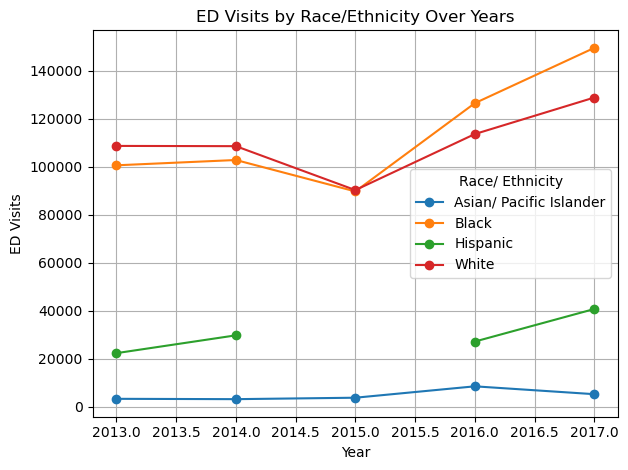

In [280]:
# Aggregate the data by 'Year' and 'Race/ ethnicity', summing up the 'ED visits'
grouped_data = final_merged_data_cleaned.groupby(['Year', 'Race/ ethnicity'])['ED visits'].sum().unstack()

# Plot the data
grouped_data.plot(kind='line', marker='o')
plt.title('ED Visits by Race/Ethnicity Over Years')
plt.xlabel('Year')
plt.ylabel('ED Visits')
plt.grid(True)
plt.legend(title='Race/ Ethnicity')
plt.tight_layout()

# Show the plot
plt.show()



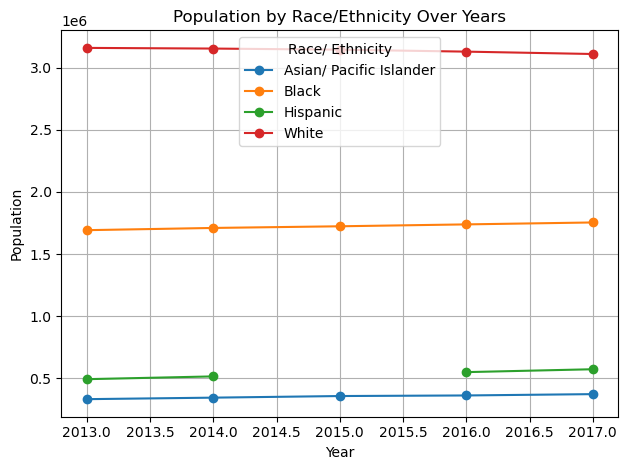

In [282]:
grouped_data = final_merged_data_cleaned.groupby(['Year', 'Race/ ethnicity'])['Population'].sum().unstack()
grouped_data.plot(kind='line', marker='o')

# Set the title and labels
plt.title('Population by Race/Ethnicity Over Years')
plt.xlabel('Year')
plt.ylabel('Population')

# Set grid, legend, and layout
plt.grid(True)
plt.legend(title='Race/ Ethnicity')
plt.tight_layout()

# Set x-axis ticks to show each year from 2012 to 2017
#plt.xticks(range(2012, 2018))  # Assuming the 'Year' column is in integer format

# Show the plot
plt.show()

In [283]:
#normality check:

from scipy.stats import pearsonr

# Assuming ready_data is your DataFrame
# Calculate the correlation coefficient between 'Population' and 'ED visits'
correlation_ed_visits, _ = pearsonr(final_merged_data_cleaned['Population'], final_merged_data_cleaned['ED visits'])

# Calculate the correlation coefficient between 'Population' and 'University Enrollment'
correlation_university_enrollment, _ = pearsonr(final_merged_data_cleaned['Population'], final_merged_data_cleaned['University Enrollment'])

print(f"Correlation between Population and ED visits: {correlation_ed_visits}")
print(f"Correlation between Population and University Enrollment: {correlation_university_enrollment}")

Correlation between Population and ED visits: 0.8416409711991073
Correlation between Population and University Enrollment: 0.9968426003538665


In [268]:
final_merged_data_cleaned['intercept'] = [1]*final_merged_data_cleaned.shape[0]
final_merged_data_cleaned.head(20)

race_indicators = pd.get_dummies(final_merged_data_cleaned['Race/ ethnicity'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
final_merged_data_cleaned = pd.concat([final_merged_data_cleaned, race_indicators], axis=1)

# Add an intercept
final_merged_data_cleaned['intercept'] = 1

# Define the explanatory variables, including the intercept and dummy variables
explanatory_variables = ['intercept', 'Black', 'Hispanic', 'White', 'University Enrollment', 'Average Weekly Earnings', 'Employed Percent']

# Define the response variable
response_variable = 'ED visits'

# Select the explanatory variables and response variable from ready_data
X = ready_data[explanatory_variables]
y = ready_data[response_variable]

# Fit the model
model = sm.OLS(y, X, missing='drop').fit()

# Print the summary of the model
model.summary()

/var/folders/b_/zvz66r790cx4rcyvc01dc1h40000gn/T/ipykernel_3333/298964416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_data_cleaned['intercept'] = [1]*final_merged_data_cleaned.shape[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ED visits   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     19.54
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.35e-06
Time:                        17:26:07   Log-Likelihood:                -262.59
No. Observations:                  23   AIC:                             535.2
Df Residuals:                      18   BIC:                             540.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                2.664e+04   5786.910      4.603      0.000    1.45e+04    3.88e+04
Black                    2.082e+05   7.71e+04      2.699      0.015    4.61e+04     3.7e+05
Hispanic                 4.832e+04   1.34e+04      3.605      0.002    2.02e+04    7.65e+04
White                    2.778e+05   1.31e+05      2.122      0.048    2741.427    5.53e+05
University Enrollment      -1.7668      1.156     -1.529      0.144      -4.195       0.662
Average Weekly Earnings    10.1750     21.019      0.484      0.634     -33.984      54.334
Employed Percent         1.763e+05   7.74e+04      2.277      0.035    1.36e+04    3.39e+05
==============================================================================
Omnibus:                       20.923   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.547
Skew:                           1.746   Prob(JB):                     2.33e-07
Kurtosis:                       7.436   Cond. No.                     6.68e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.56e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [249]:
#Calculate the regression model about what factories could be contributed to the ED visits difference?

f_average_values_race = final_merged_data_cleaned.groupby('Race/ ethnicity').agg({
    'University Enrollment': 'mean',
    'ED visits': 'mean',
    'Average Weekly Earnings': 'mean',
    'Employed Percent': 'mean',
    'Population': 'mean'
}).reset_index()


f_average_values_race.head()

,Race/ ethnicity,University Enrollment,ED visits,Average Weekly Earnings,Employed Percent,Population
0,Asian/ Pacific Islander,26252.80,4833.46,1173.918363,0.066811,354139.80
1,Black,102056.40,113878.06,988.295689,0.274691,1723648.00
2,Hispanic,29421.75,30034.70,806.768149,0.103390,533120.75
3,White,168571.60,110048.26,1264.333718,0.532791,3138657.40


F-statistic: nan, P-value: nan


In [250]:
race_indicators = pd.get_dummies(average_values_race['Race/ ethnicity'])
race_indicators.head(20)

,Asian/ Pacific Islander,Black,Hispanic,White
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [256]:
f_average_values_race = pd.concat([average_values_race, race_indicators[['Black', 'Hispanic', 'White']]],axis = 1)
f_average_values_race.head()

,Race/ ethnicity,University Enrollment,ED visits,Average Weekly Earnings,Employed Percent,Black,Hispanic,White,intercept,Black,Hispanic,White,Black,Hispanic,White,Black,Hispanic,White
0,Asian/ Pacific Islander,25935.000000,4536.783333,1173.918363,0.066811,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Black,102914.833333,111493.016667,988.295689,0.274691,1,0,0,1,1,0,0,1,0,0,1,0,0
2,Hispanic,28347.400000,51310.360000,806.768149,0.103390,0,1,0,1,0,1,0,0,1,0,0,1,0
3,White,171222.500000,108753.716667,1264.333718,0.532791,0,0,1,1,0,0,1,0,0,1,0,0,1


In [261]:
f_average_values_race['intercept'] = [1]*f_average_values_race.shape[0]
f_average_values_race.head(20)

race_indicators = pd.get_dummies(f_average_values_race['Race/ ethnicity'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
f_average_values_race = pd.concat([f_average_values_race, race_indicators], axis=1)

# Add an intercept
f_average_values_race['intercept'] = 1

# Define the explanatory variables, including the intercept and dummy variables
explanatory_variables = ['intercept', 'Black', 'Hispanic', 'White', 'University Enrollment', 'Average Weekly Earnings', 'Employed Percent']

# Define the response variable
response_variable = 'ED visits'

# Select the explanatory variables and response variable from ready_data
X = ready_data[explanatory_variables]
y = ready_data[response_variable]

# Fit the model
model = sm.OLS(y, X, missing='drop').fit()

# Print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ED visits   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     19.54
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.35e-06
Time:                        15:19:51   Log-Likelihood:                -262.59
No. Observations:                  23   AIC:                             535.2
Df Residuals:                      18   BIC:                             540.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                2.664e+04   5786.910      4.603      0.000    1.45e+04    3.88e+04
Black                    2.082e+05   7.71e+04      2.699      0.015    4.61e+04     3.7e+05
Hispanic                 4.832e+04   1.34e+04      3.605      0.002    2.02e+04    7.65e+04
White                    2.778e+05   1.31e+05      2.122      0.048    2741.427    5.53e+05
University Enrollment      -1.7668      1.156     -1.529      0.144      -4.195       0.662
Average Weekly Earnings    10.1750     21.019      0.484      0.634     -33.984      54.334
Employed Percent         1.763e+05   7.74e+04      2.277      0.035    1.36e+04    3.39e+05
==============================================================================
Omnibus:                       20.923   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.547
Skew:                           1.746   Prob(JB):                     2.33e-07
Kurtosis:                       7.436   Cond. No.                     6.68e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.56e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [331]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure the data is 1-dimensional by selecting the Series directly
white_series = average_values_race['White'].squeeze()
black_series = average_values_race['Black'].squeeze()
hispanic_series = average_values_race['Hispanic'].squeeze()
ed_visits_series = average_values_race['ED visits'].squeeze()

# Drop any rows with NaN or infinite values across the selected columns
clean_data = average_values_race.dropna(subset=['White', 'Black', 'Hispanic', 'ED visits'])

# Ensure that the Series are aligned
white_series = clean_data['White']
black_series = clean_data['Black']
hispanic_series = clean_data['Hispanic']
ed_visits_series = clean_data['ED visits']

# Now attempt to plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=white_series, y=ed_visits_series, color='blue', label='White')
sns.scatterplot(x=black_series, y=ed_visits_series, color='red', label='Black')
sns.scatterplot(x=hispanic_series, y=ed_visits_series, color='green', label='Hispanic')
plt.legend()
plt.xlabel('Race Dummy Variable')
plt.ylabel('ED Visits')
plt.title('Correlation between ED Visits and Race')
plt.show()

ValueError: Data must be 1-dimensional

<Figure size 1000x600 with 0 Axes>